# Dataset statistics

Since Sat. Feb. 26th, 2022


Understand the input representation to models, e.g. token size distribution, warnings in extraction


## Setup



In [2]:
%load_ext autoreload
%autoreload 2


import os
os.chdir('../..')  # so that import works

import pandas as pd
from matplotlib import rcParams

from stefutil import *
from musicnlp.preprocess import dataset
from musicnlp.postprocess import MusicVisualize


pd.set_option('display.max_rows', None)
rcParams['figure.figsize'] = (16, 10)  # TODO: `stefutil` setting rc doesn't seem to help???
rcParams['figure.dpi'] = 200


md = 'full'
dnms = ['POP909', 'MAESTRO', 'LMD', 'LMCI', 'NES-MDB']
pop, mst, lmd, lmc, nes = dataset.get_dataset_dir_name(*dnms)
fnms = [pop, mst, lmd, lmc, nes]
cnm = f'22-04-22_MusViz-Cache_{{md={md[0]}}}, dnm=5-0.1}}'
mv_args = dict(cache=cnm, subset=0.1, subset_bound=8196)
mv = MusicVisualize(filename=fnms, dataset_name=dnms, hue_by_dataset=True, pitch_kind='degree', **mv_args)


args = dict(stat='percent', upper_percentile=90)  # For MAESTRO dataset is very spread out



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-04-10 12:45:40|[Music Visualizer]::__init__::music_visualize.py:74:INFO: Initializing MusicVisualize with {cache: 22-04-09_MusViz-Cache_{md=f}, dnm=all-0.1}, subset:   0.1, subset_bound: 4096}... 
2023-04-10 12:45:40|[Music Visualizer]::__init__::music_visualize.py:75:INFO: Getting global stats... 
2023-04-10 12:45:40|[Music Visualizer]::__init__::music_visualize.py:82:INFO: Loading cached stats from /Users/stefanhg/Documents/UMich/Research/Music with NLP/Symbolic-Music-Generation/plot/cache/22-04-09_MusViz-Cache_{md=f}, dnm=all-0.1}.pkl... 
2023-04-10 12:45:59|[WordPiece Tokenizer]::from_file::wordpiece_tokenizer.py:384:INFO: Loading wordpiece tokenizer from /Users/stefanhg/Documents/UMich/Research/Music with NLP/Symbolic-Music-Generation/tokenizers/22-10-26_WordPiece-Tokenizer_{dnm=all}_{vsz=32768, n=178825, pch=d, aug-key=T}... 
2023-04-10 12:46:00|[Pair-Merge Tokenizer]::from_file::pair_mer

## Plot



2023-04-10 12:46:00|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


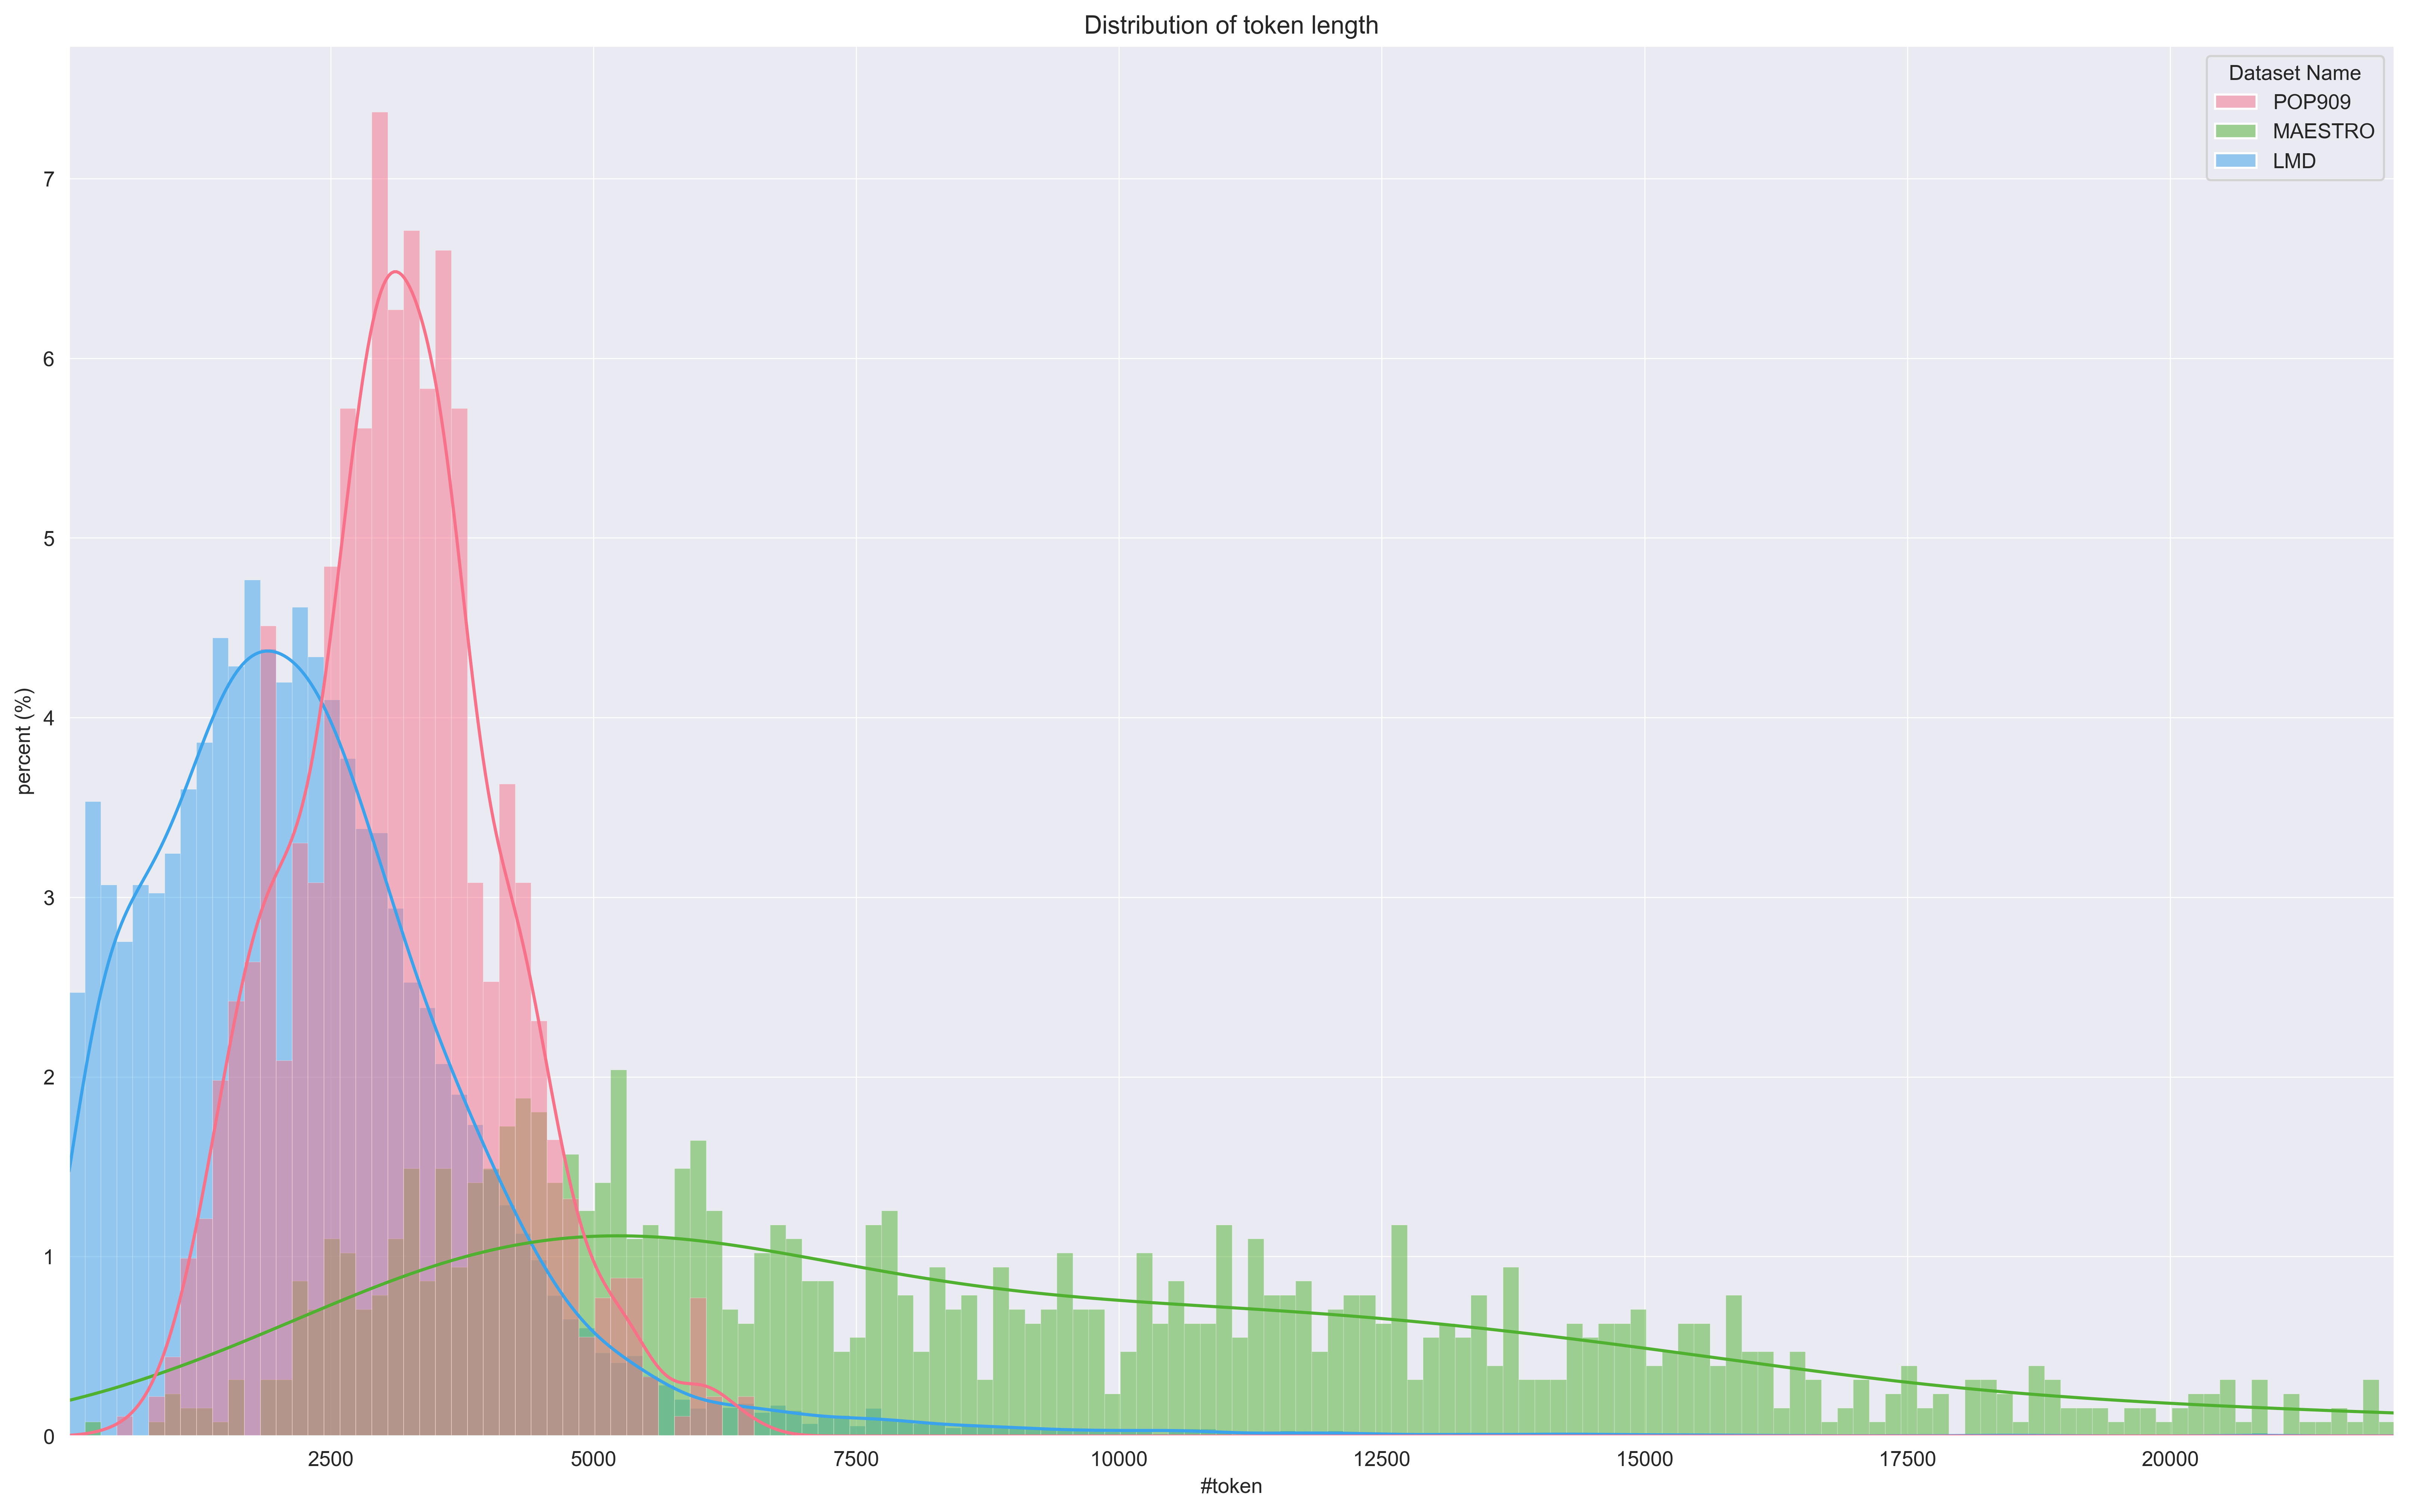

2023-04-10 12:46:09|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


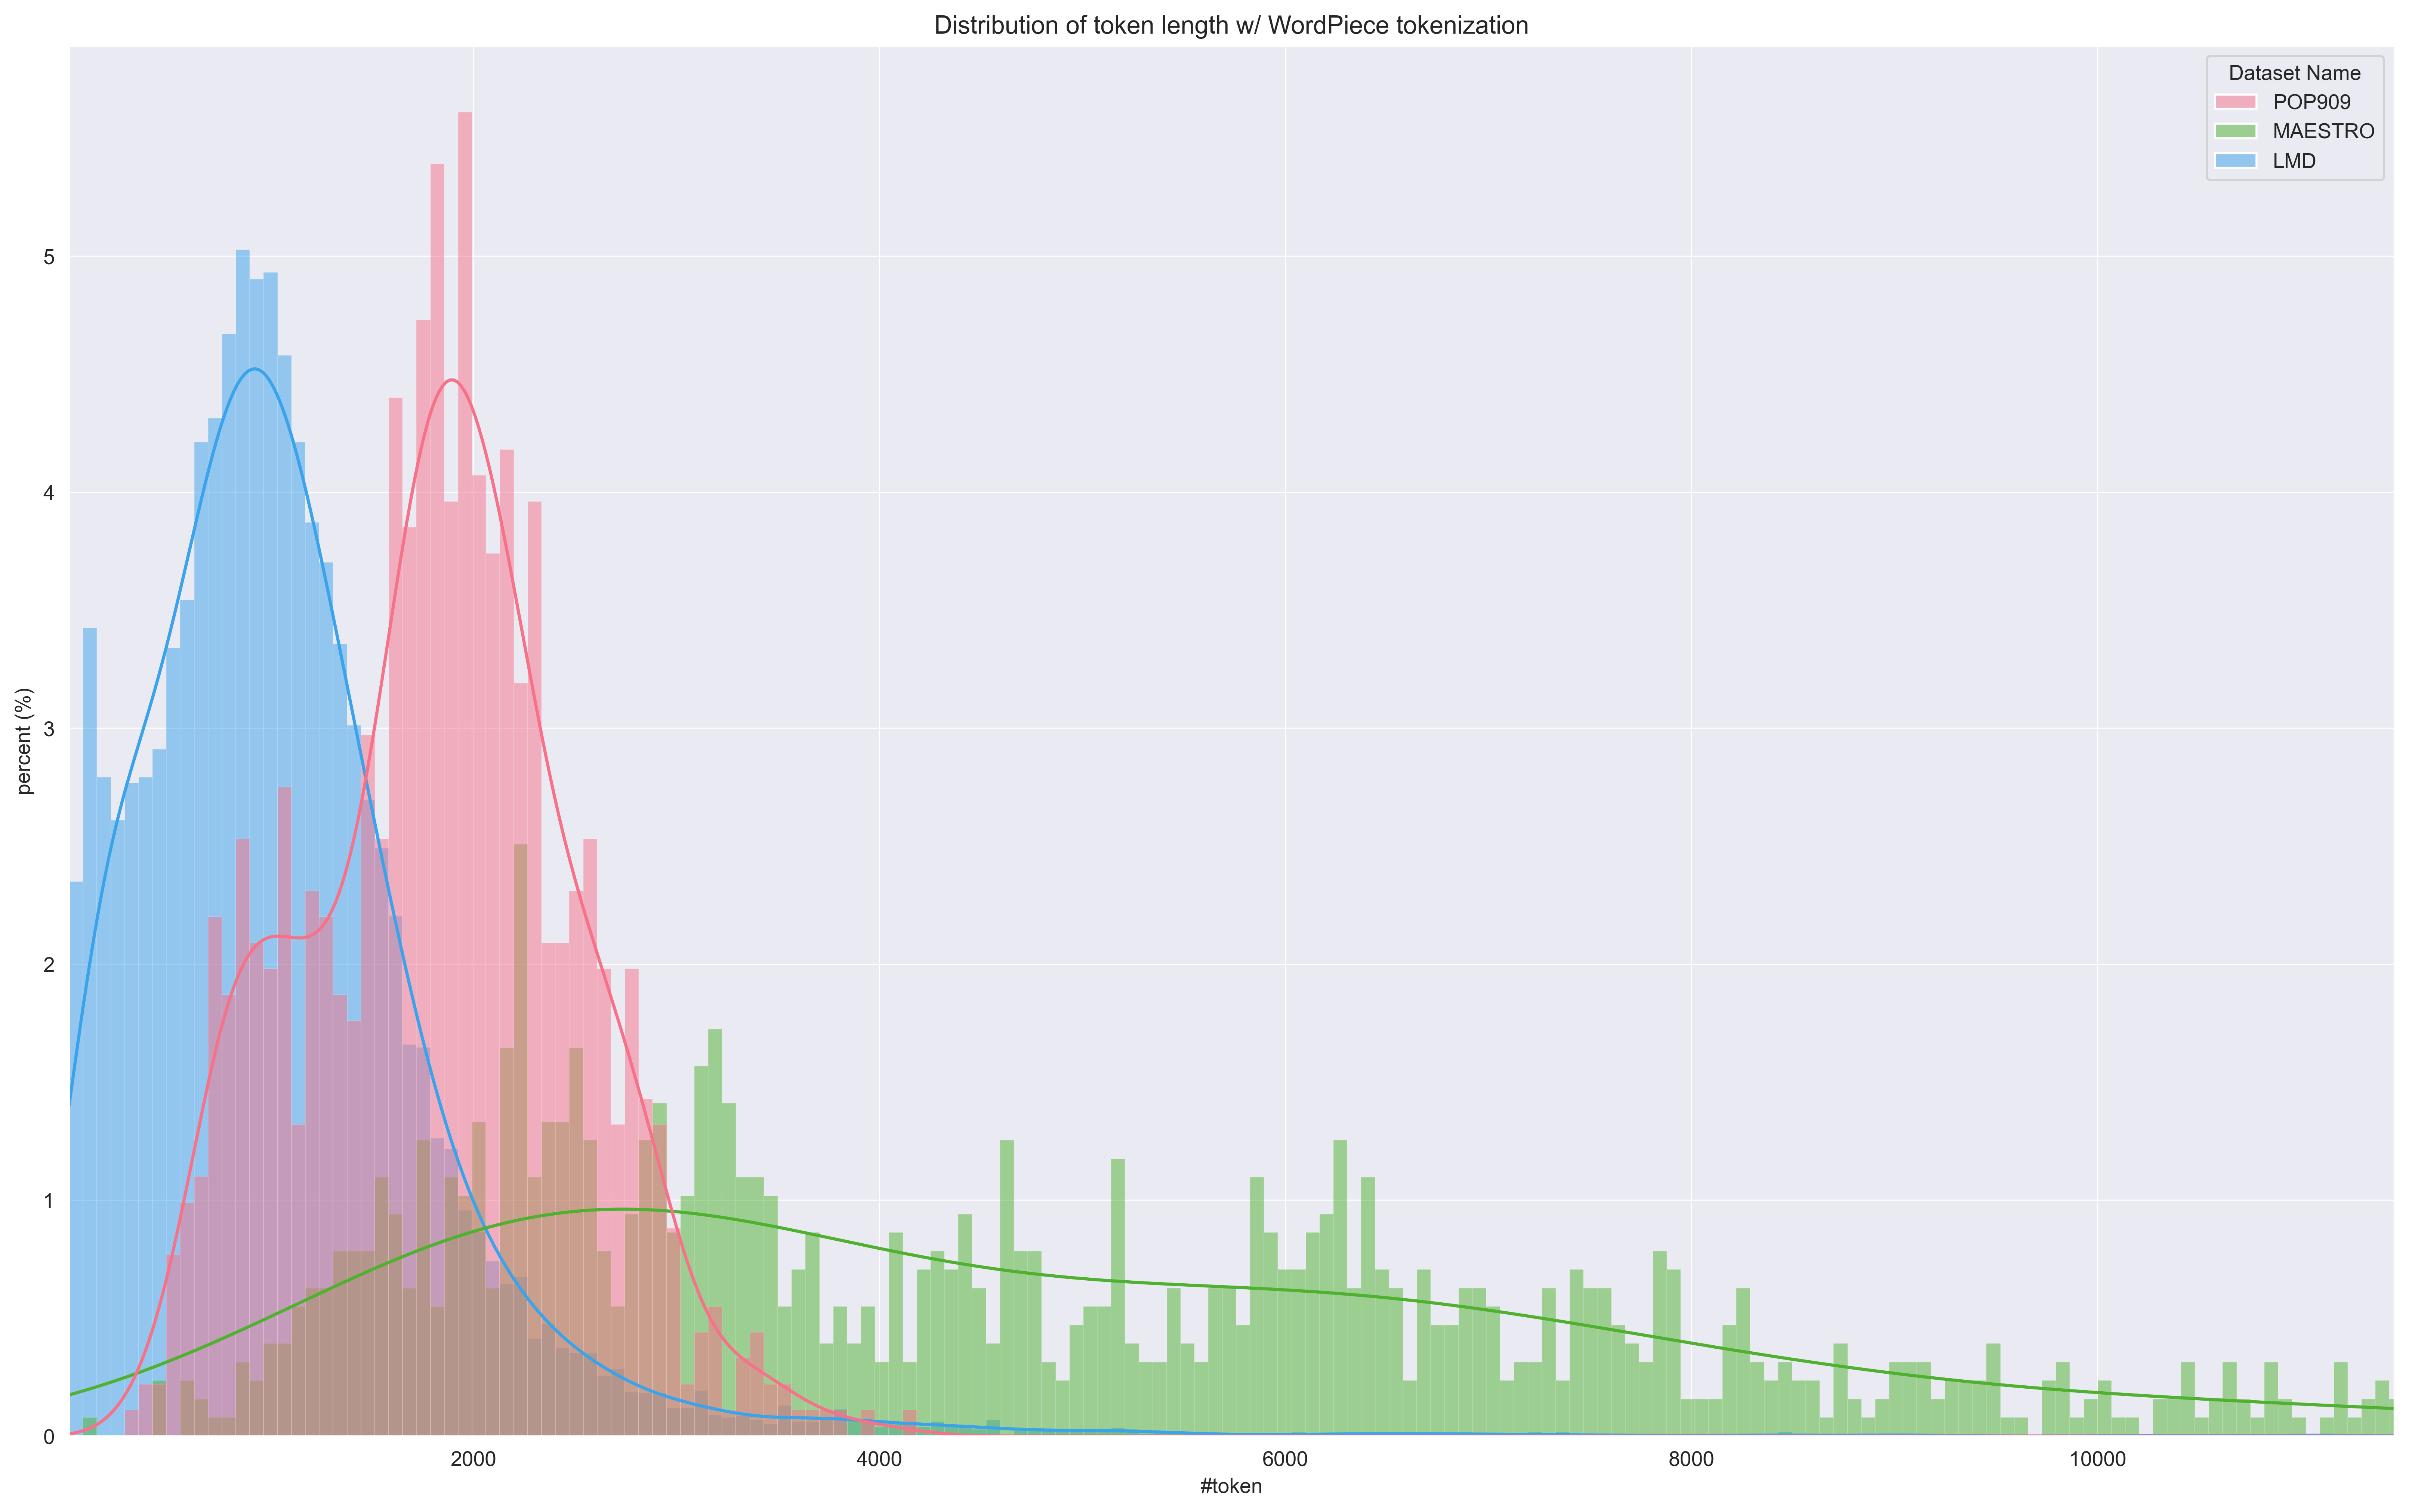

2023-04-10 12:46:19|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


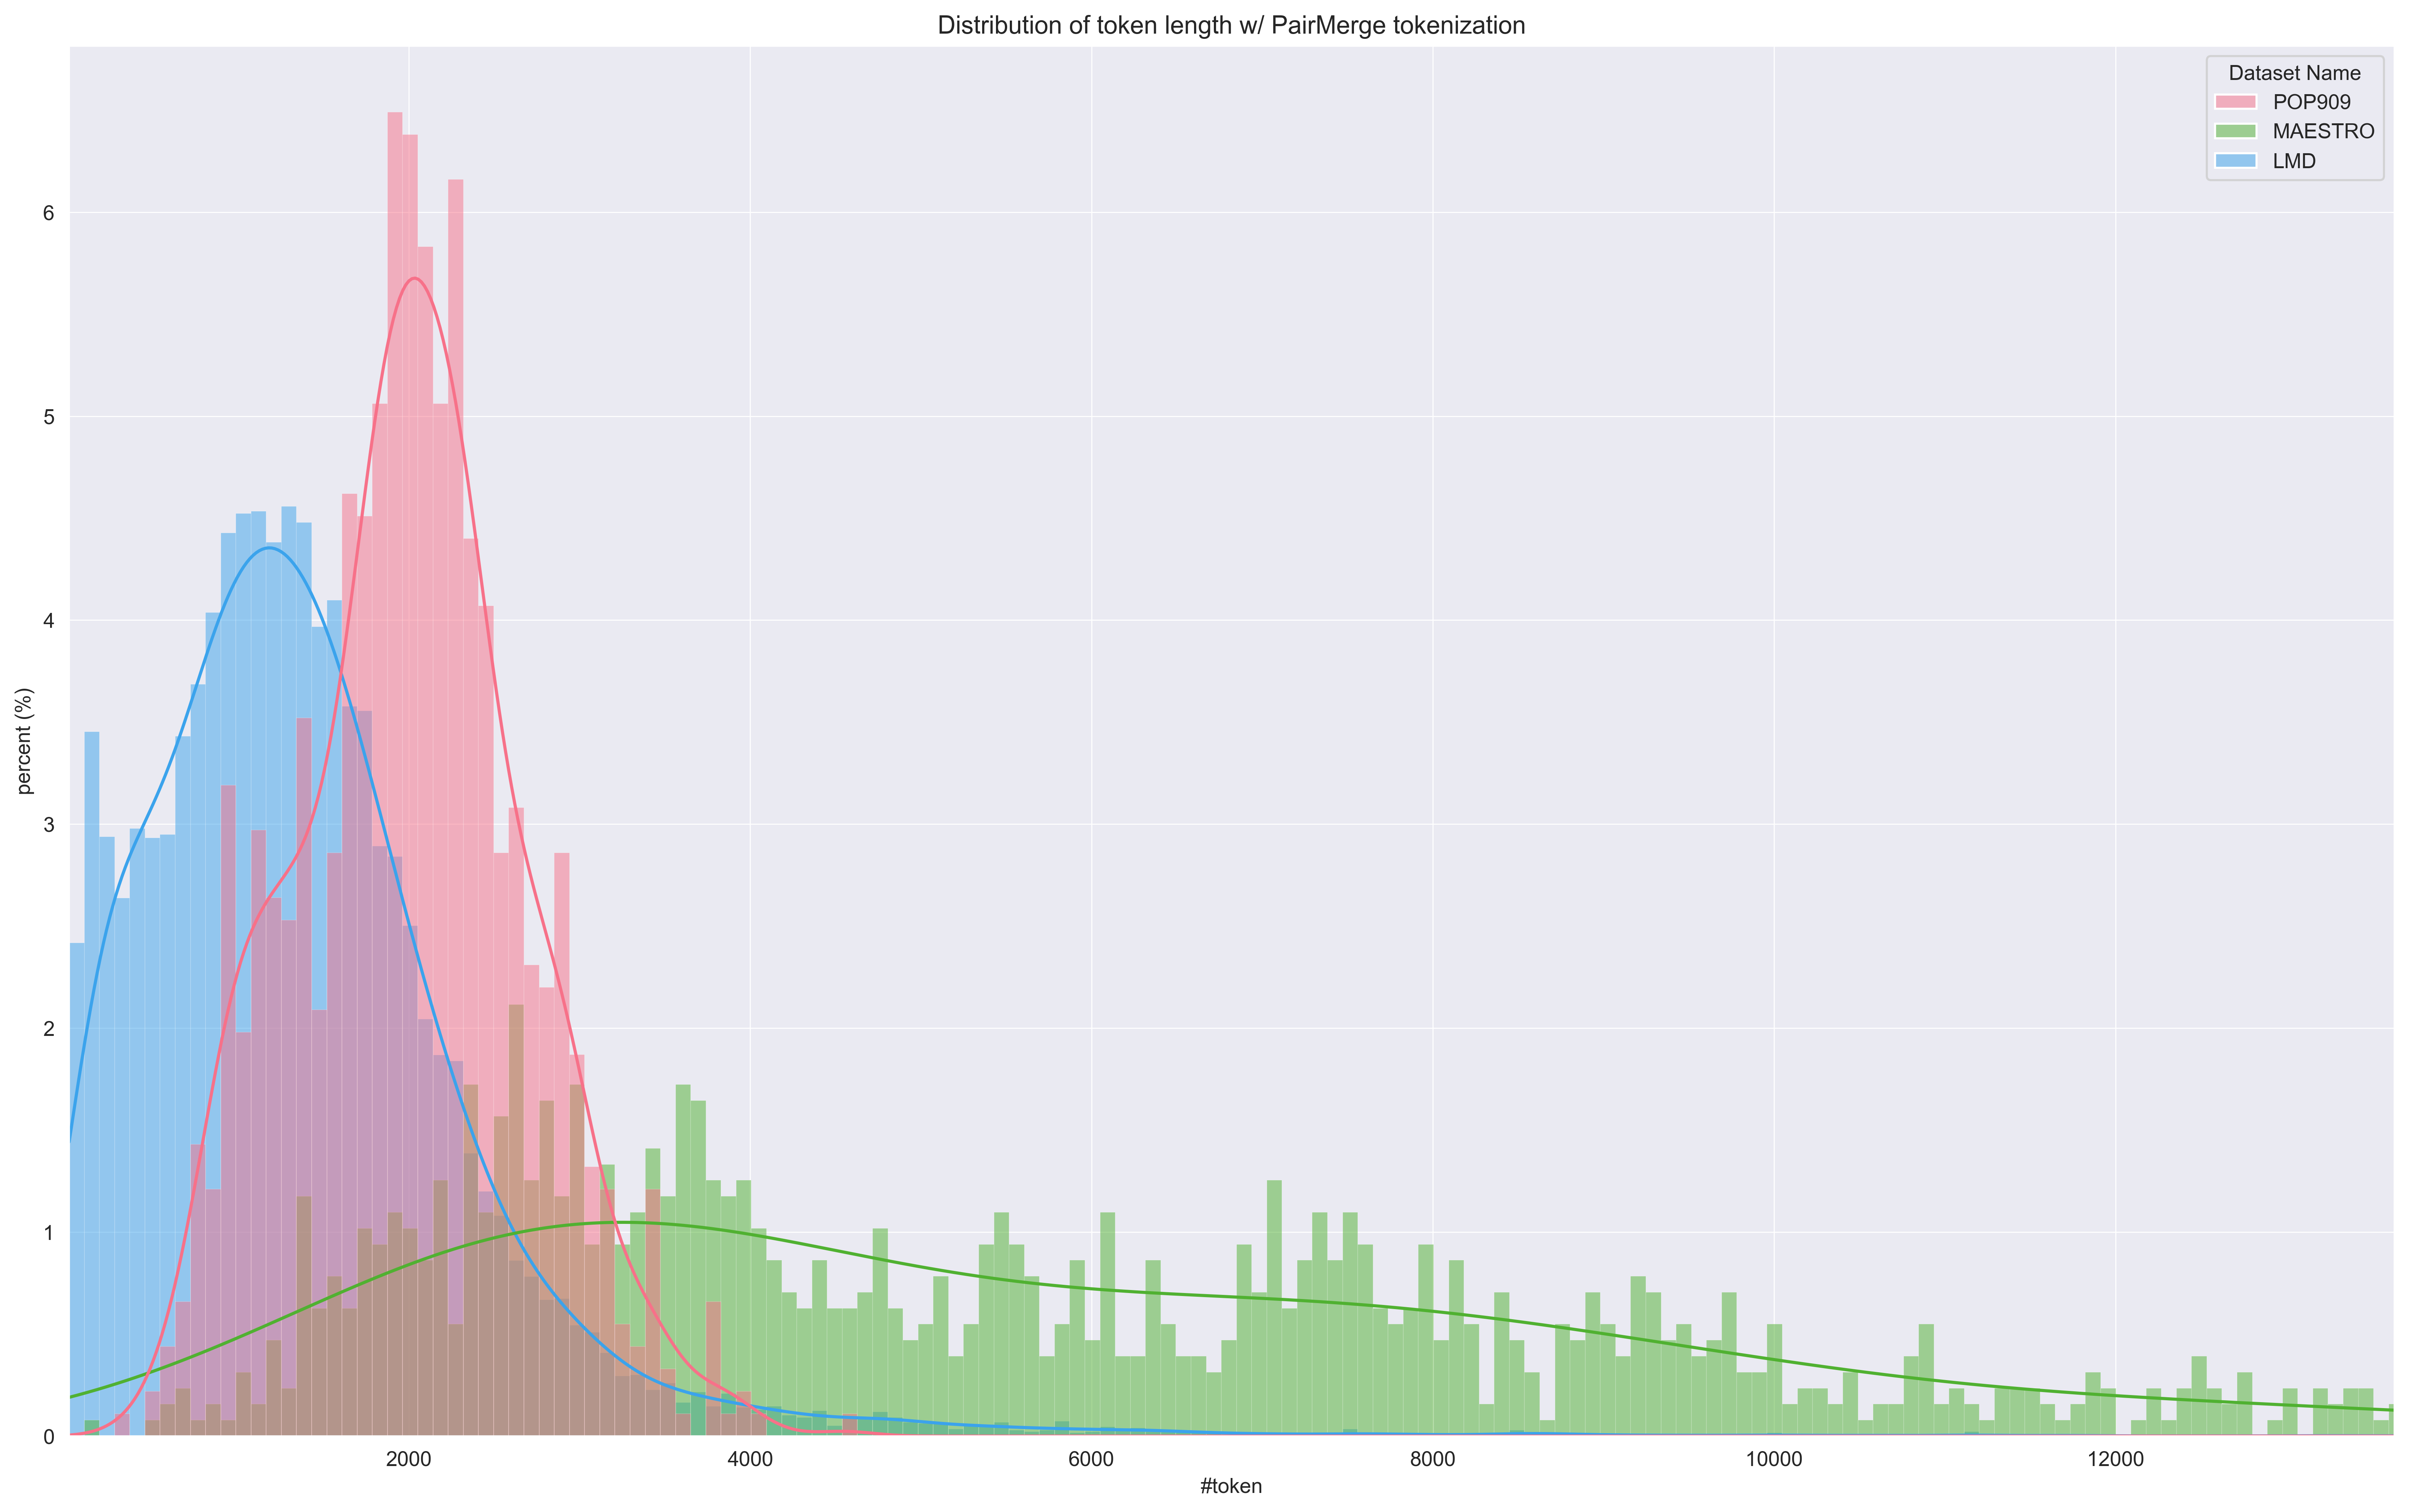

In [3]:
rcParams['figure.figsize'] = (16, 10)  # TODO
mv.token_length_dist(**args)
mv.token_length_dist(tokenize_scheme='wordpiece', **args)
mv.token_length_dist(tokenize_scheme='pairmerge', **args);



2023-04-10 12:46:29|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


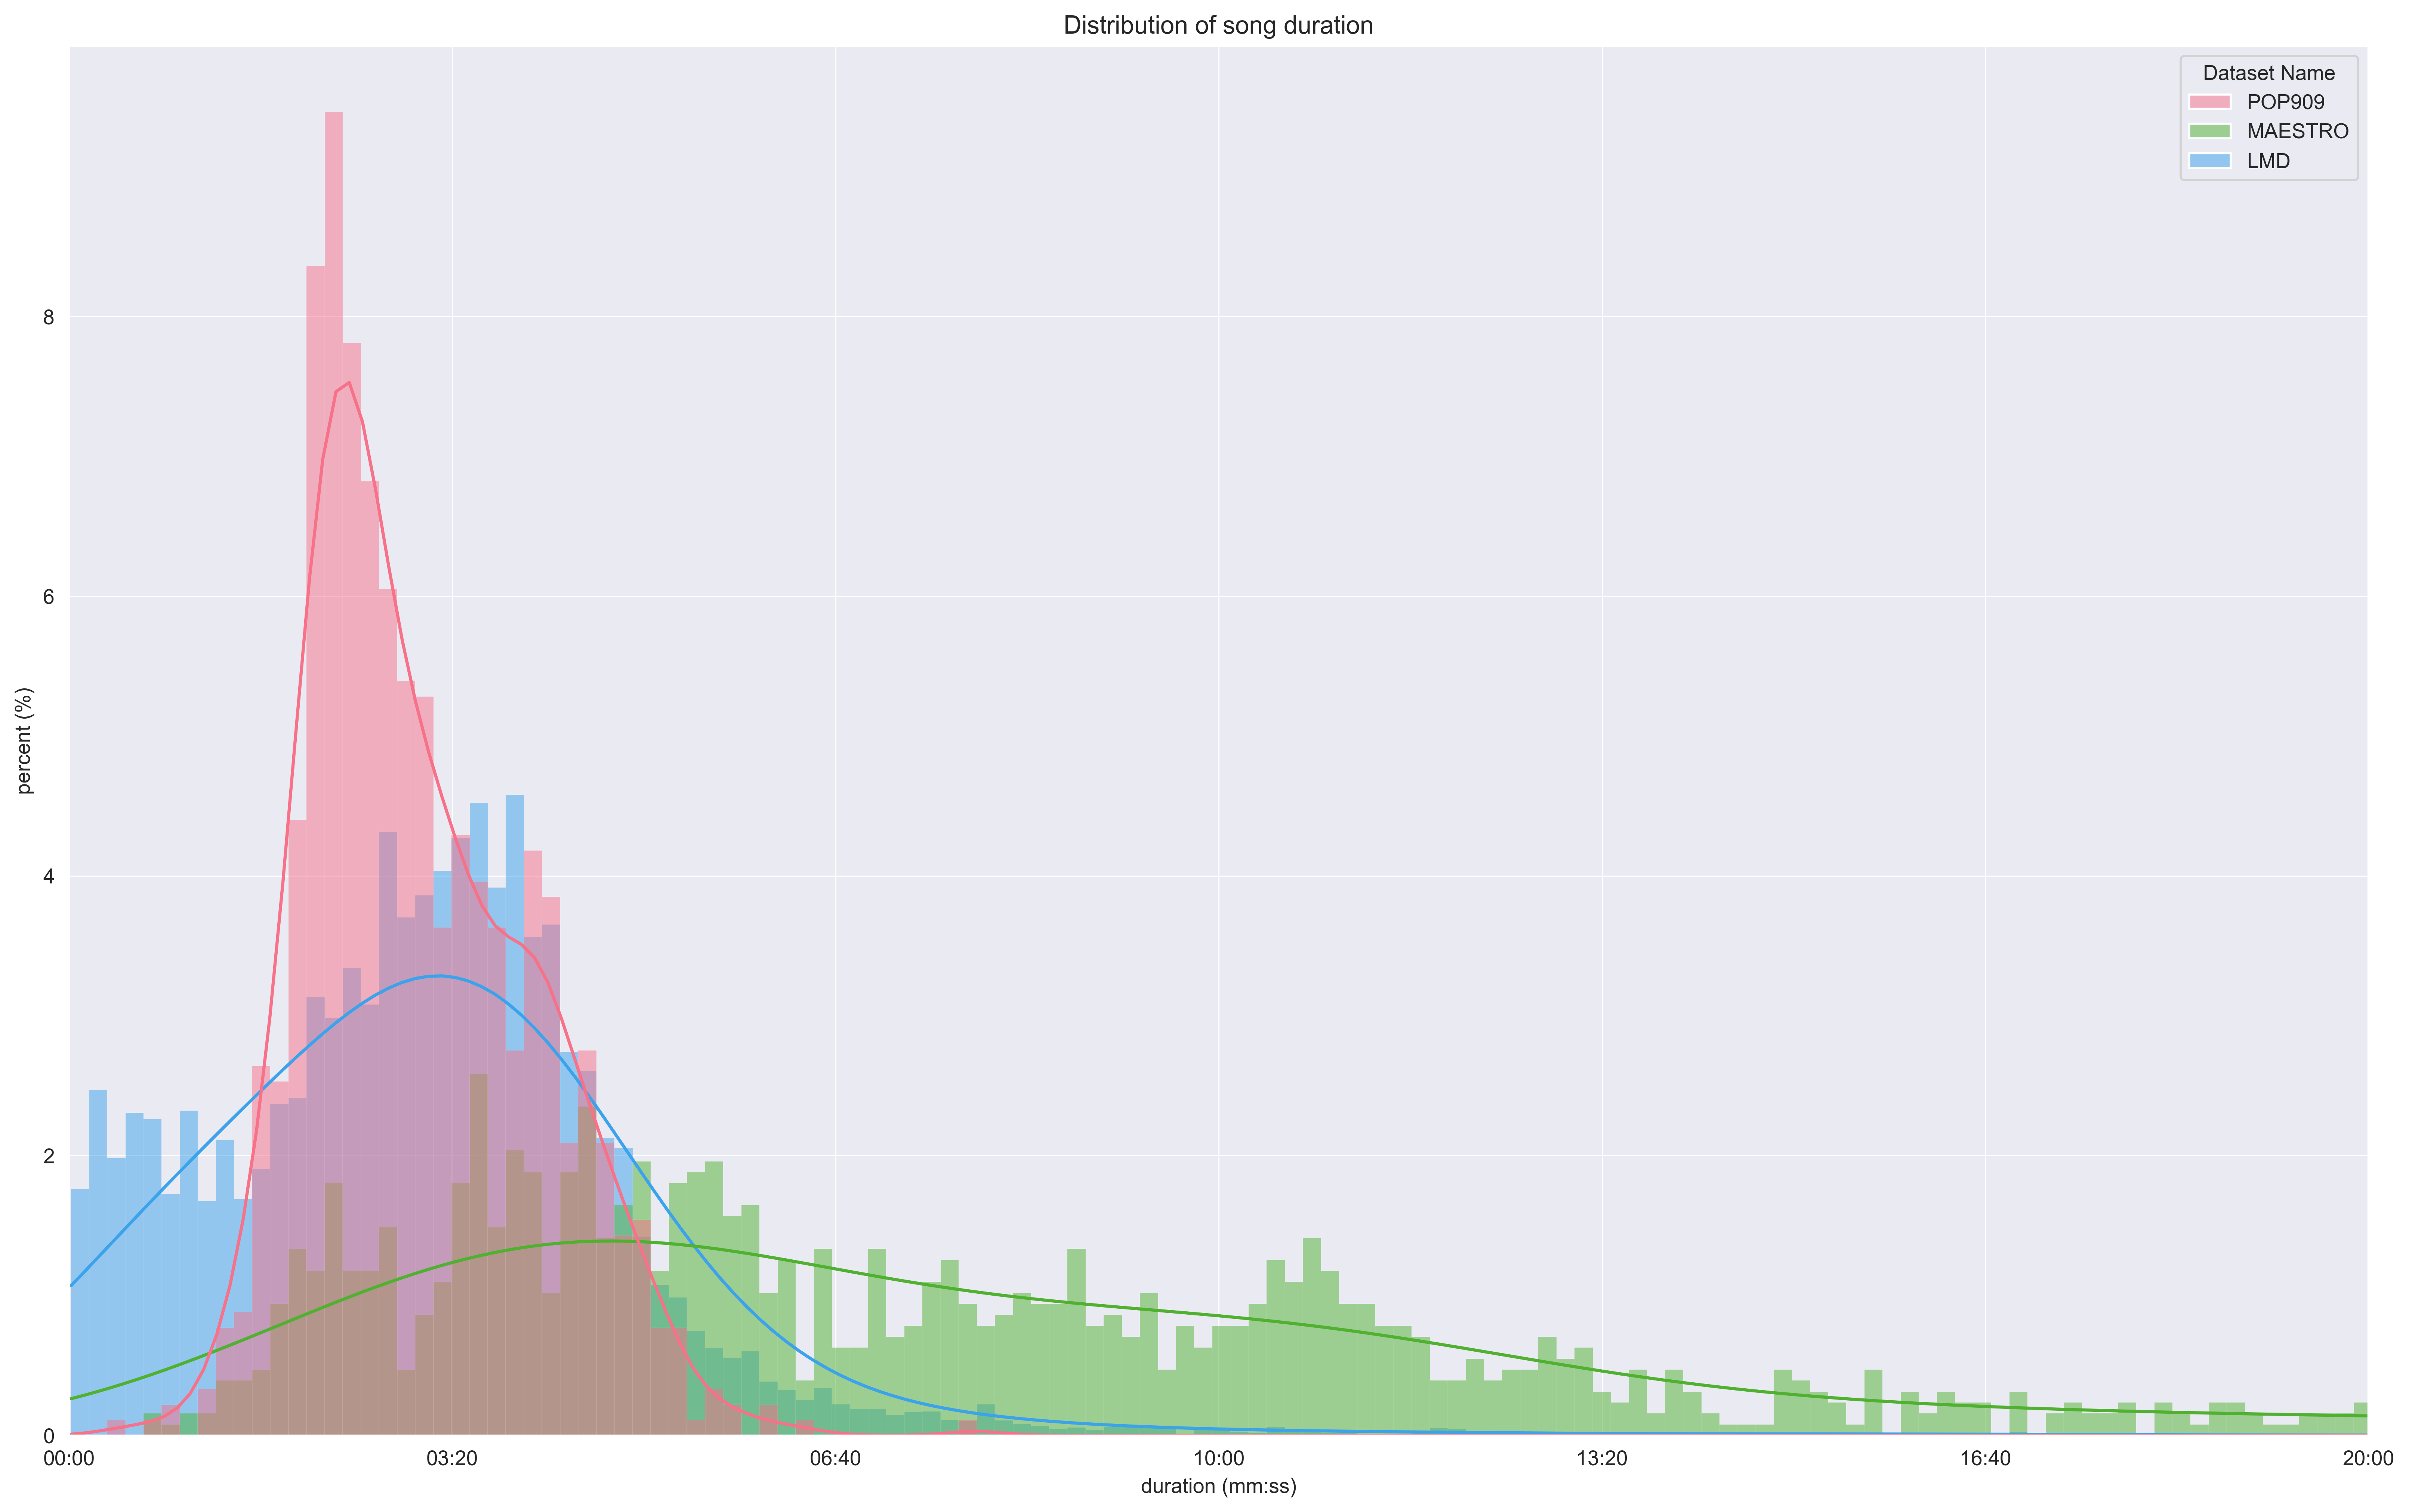

2023-04-10 12:46:52|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


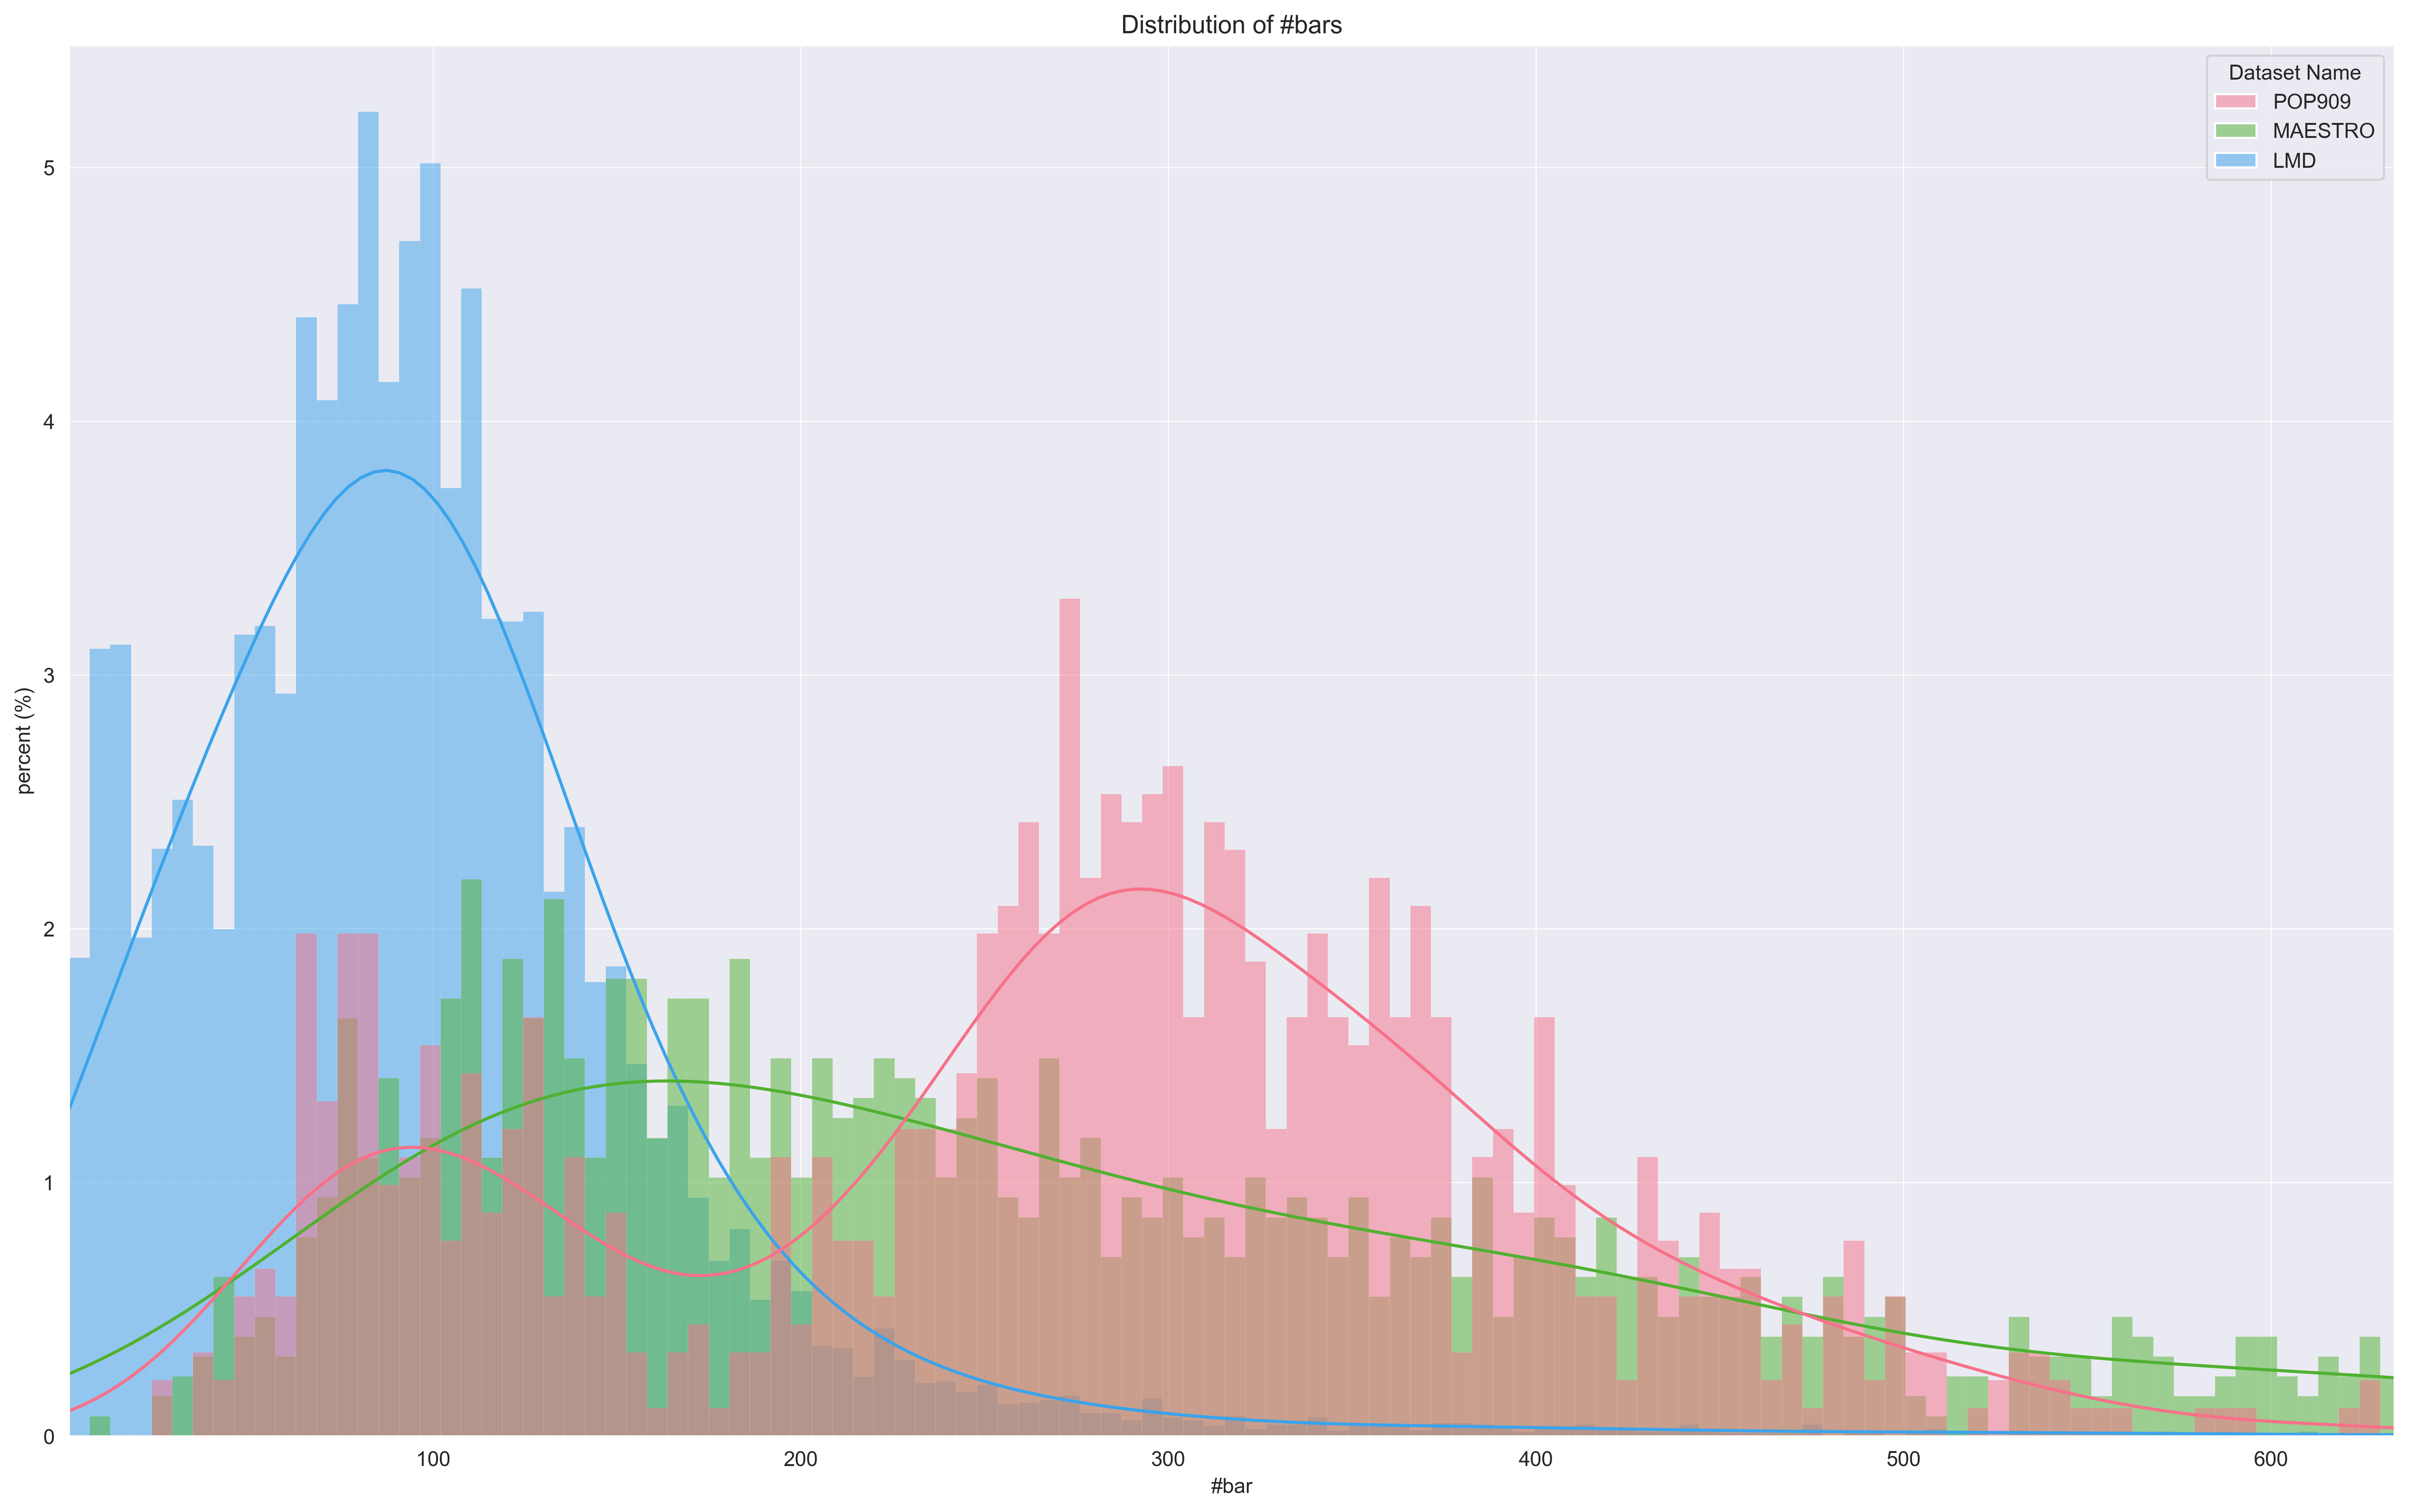

In [4]:
mv.song_duration_dist(**args)
mv.bar_count_dist(**args);



2023-04-10 12:47:18|[Music Visualizer]::time_sig_dist::music_visualize.py:390:INFO: Getting stats... 
2023-04-10 12:47:18|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


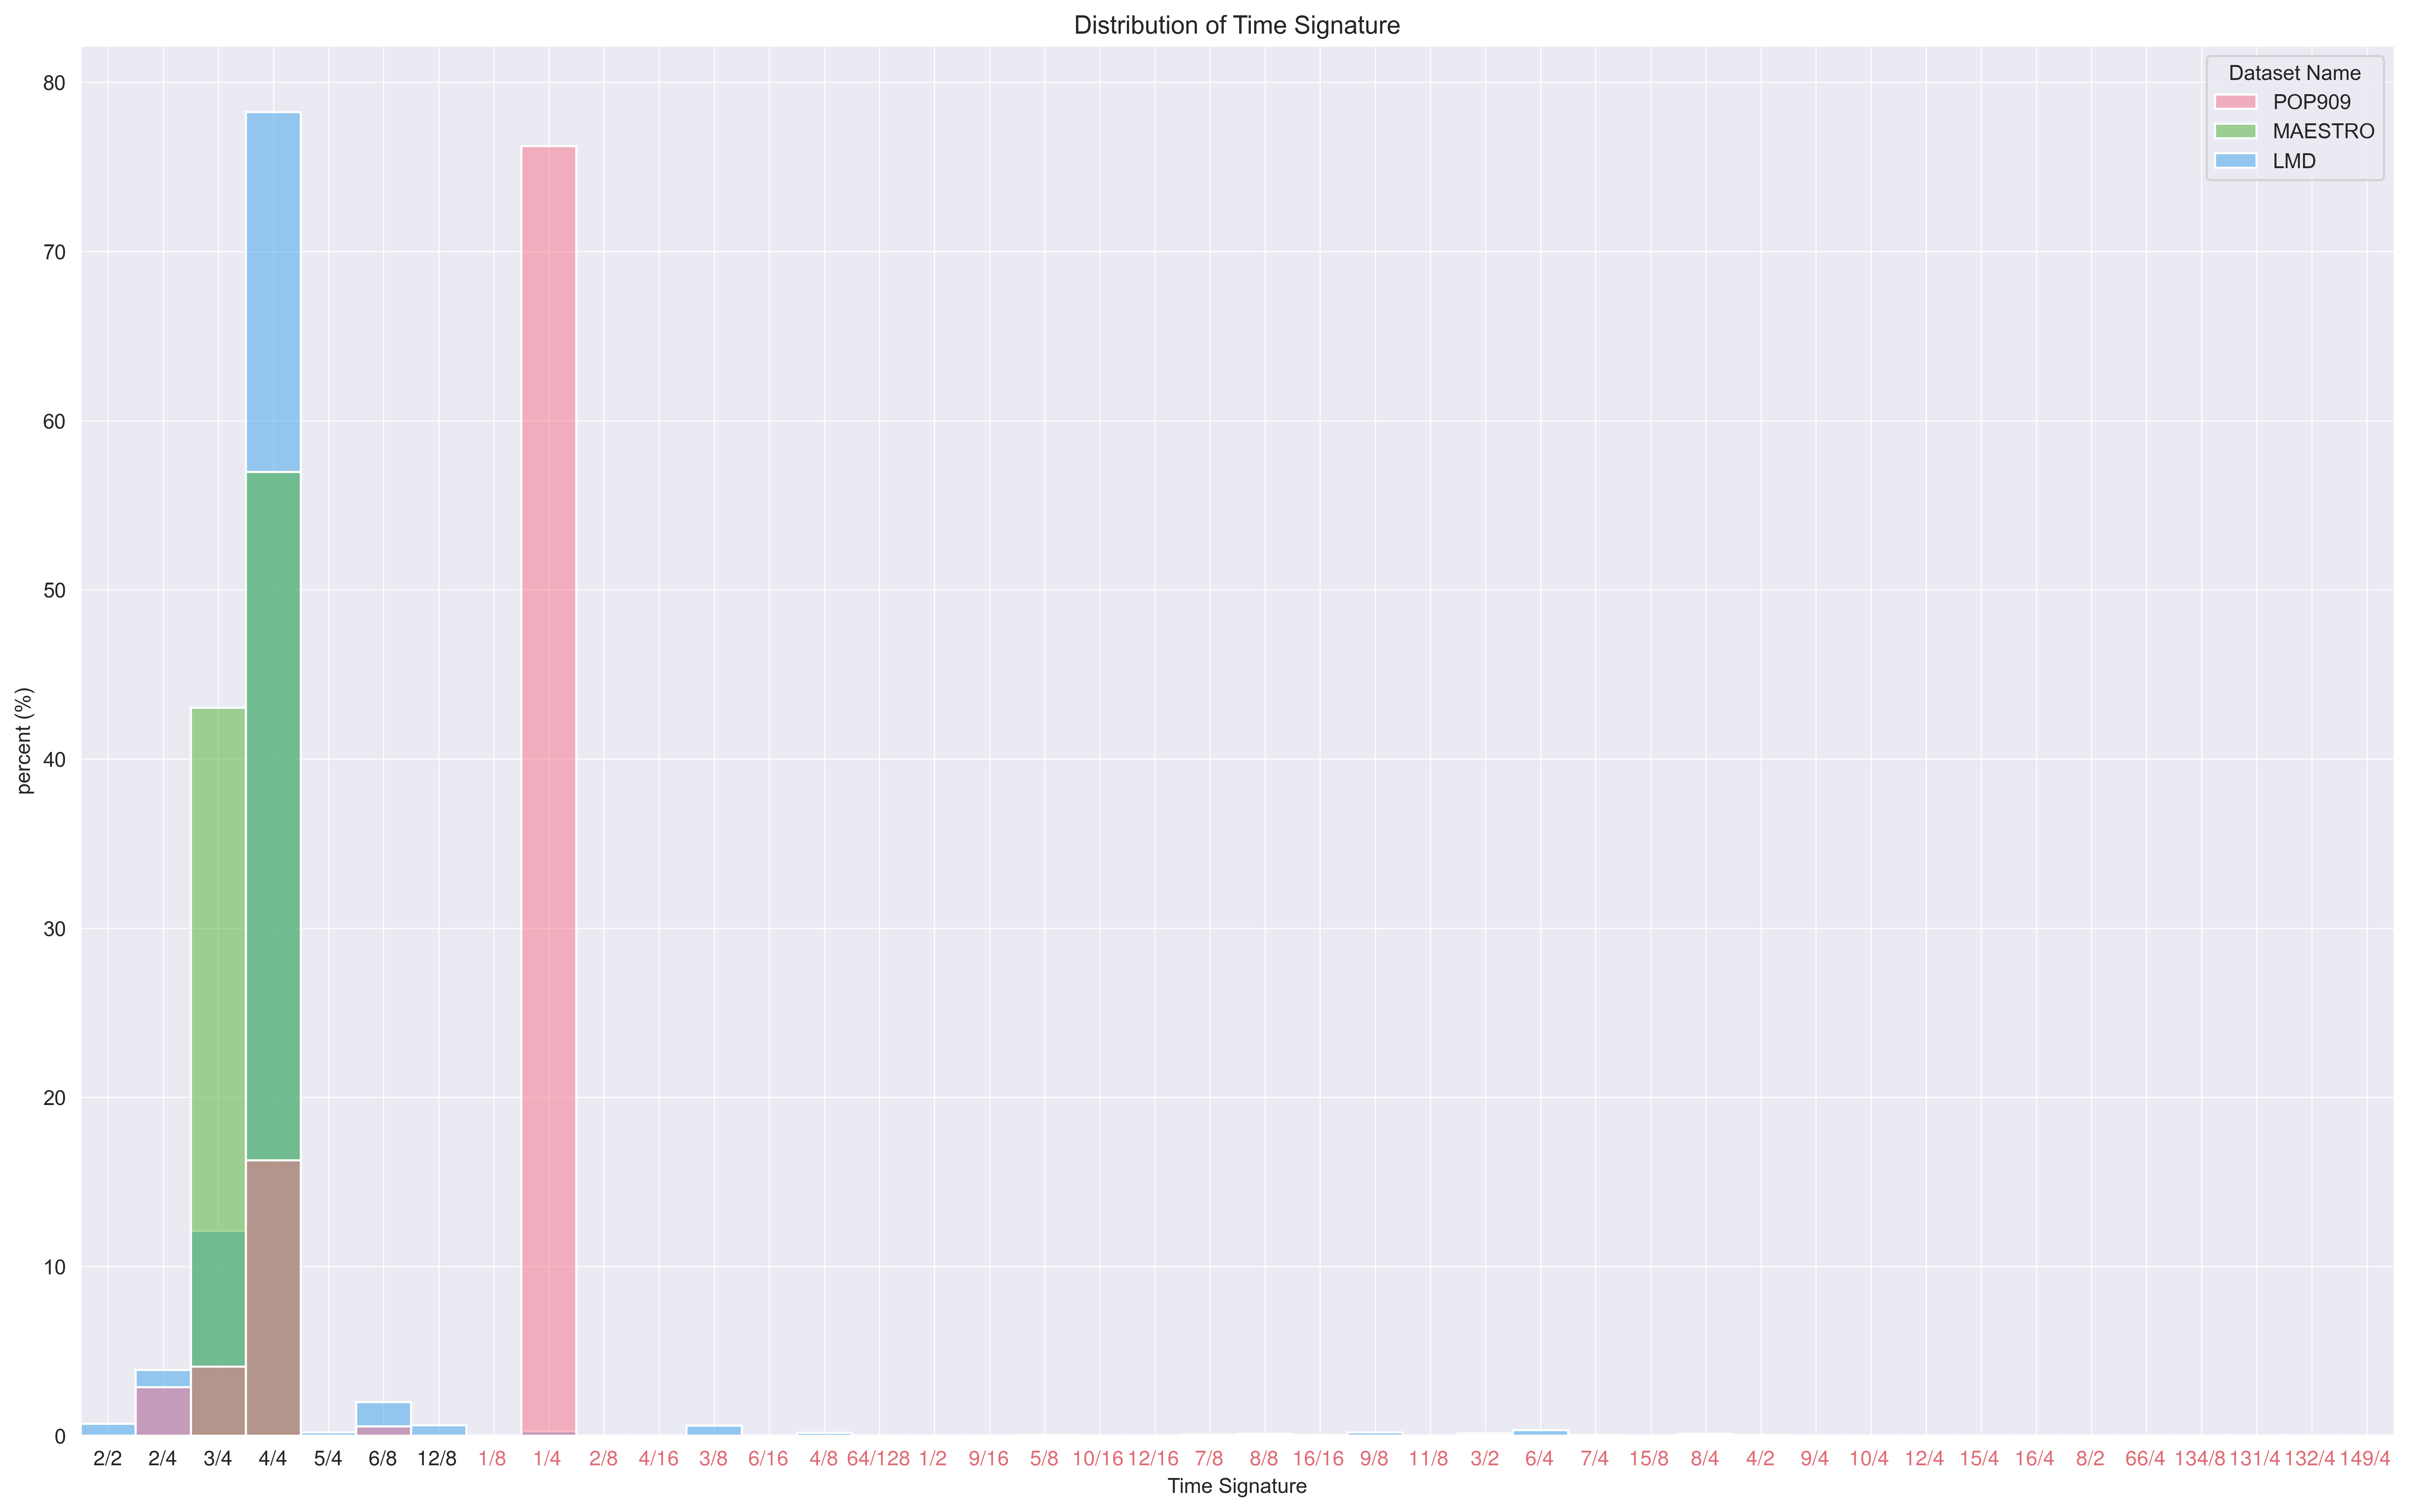

ic| mv.time_sig_dist(yscale='linear', stat='percent').df:     dataset_name time_sig_str  count
                                                          0            LMD          2/2    125
                                                          1            LMD          2/4    684
                                                          2            LMD          3/4   2138
                                                          3            LMD          4/4  13821
                                                          4            LMD          5/4     33
                                                          5            LMD          6/8    350
                                                          6            LMD         12/8    109
                                                          7            LMD          1/8      3
                                                          8            LMD          1/4     44
                                                  

2023-04-10 12:47:23|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


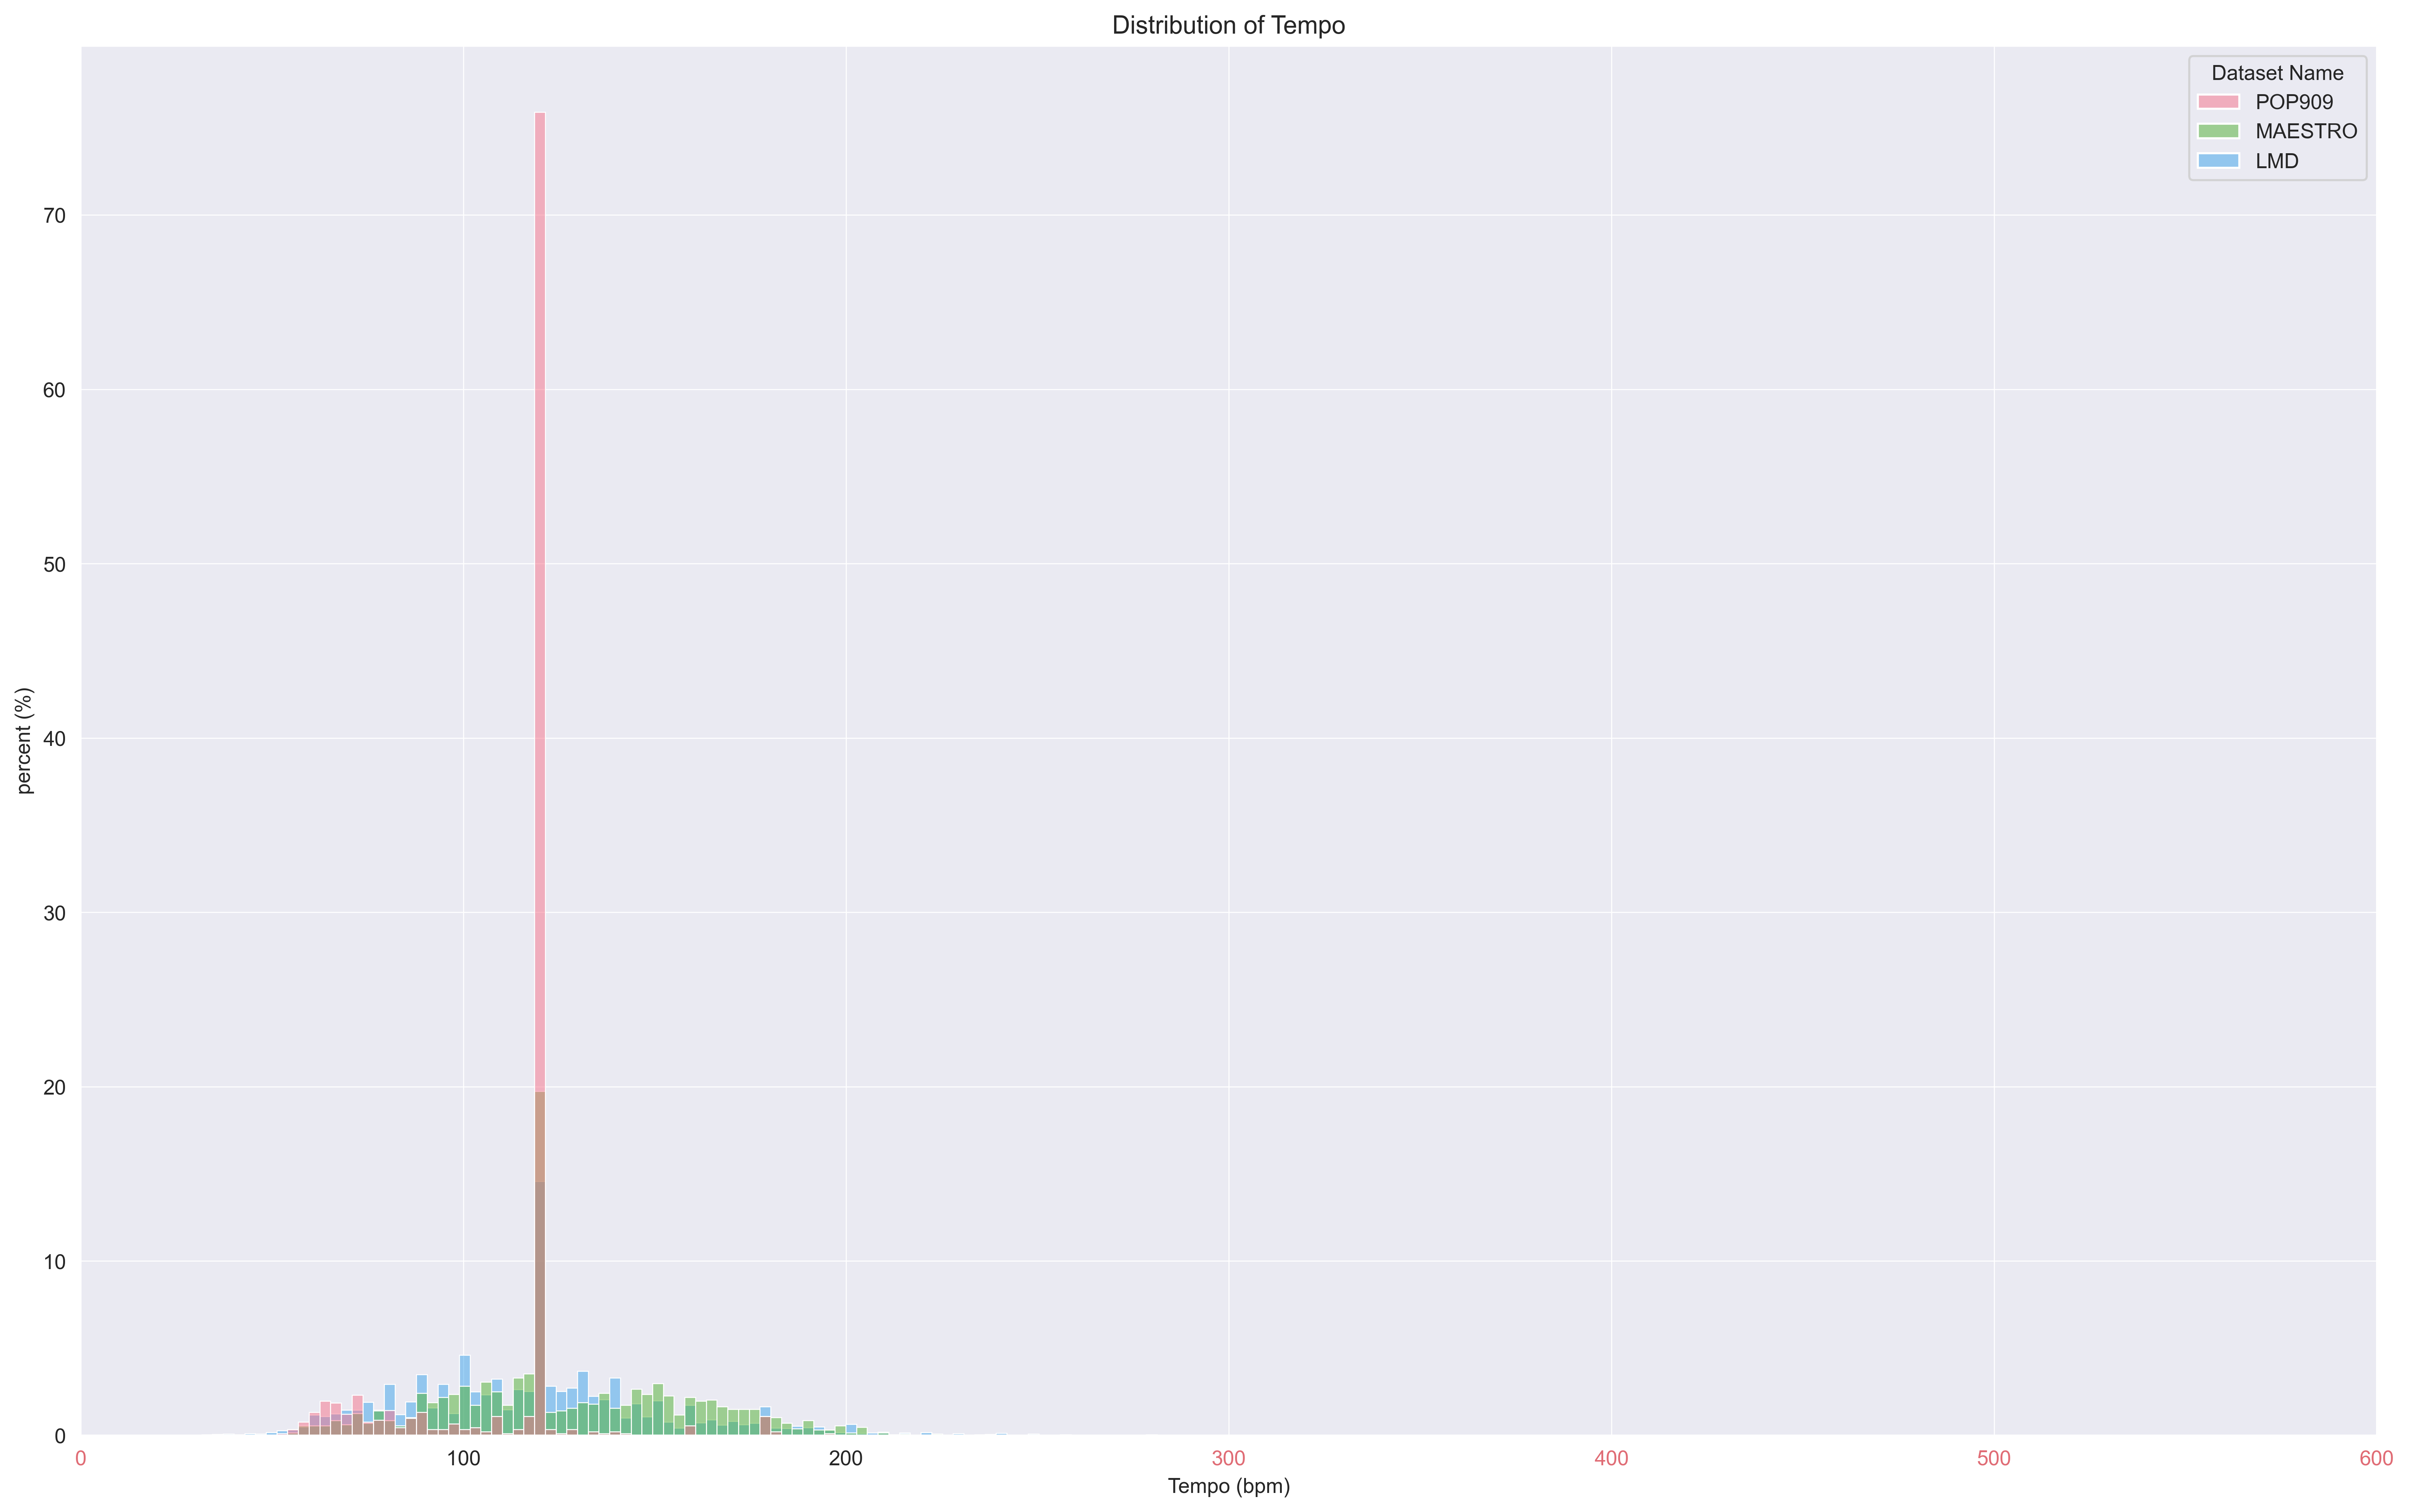

ic| mv.tempo_dist(stat='percent').df:     dataset_name  tempo  count
                                      0            LMD     12      2
                                      1            LMD     20      2
                                      2            LMD     24      1
                                      3            LMD     25      4
                                      4            LMD     29      1
                                      5            LMD     30      1
                                      6            LMD     32      3
                                      7            LMD     33      3
                                      8            LMD     34      2
                                      9            LMD     35      3
                                      10           LMD     36      6
                                      11           LMD     37      3
                                      12           LMD     38      3
                                  

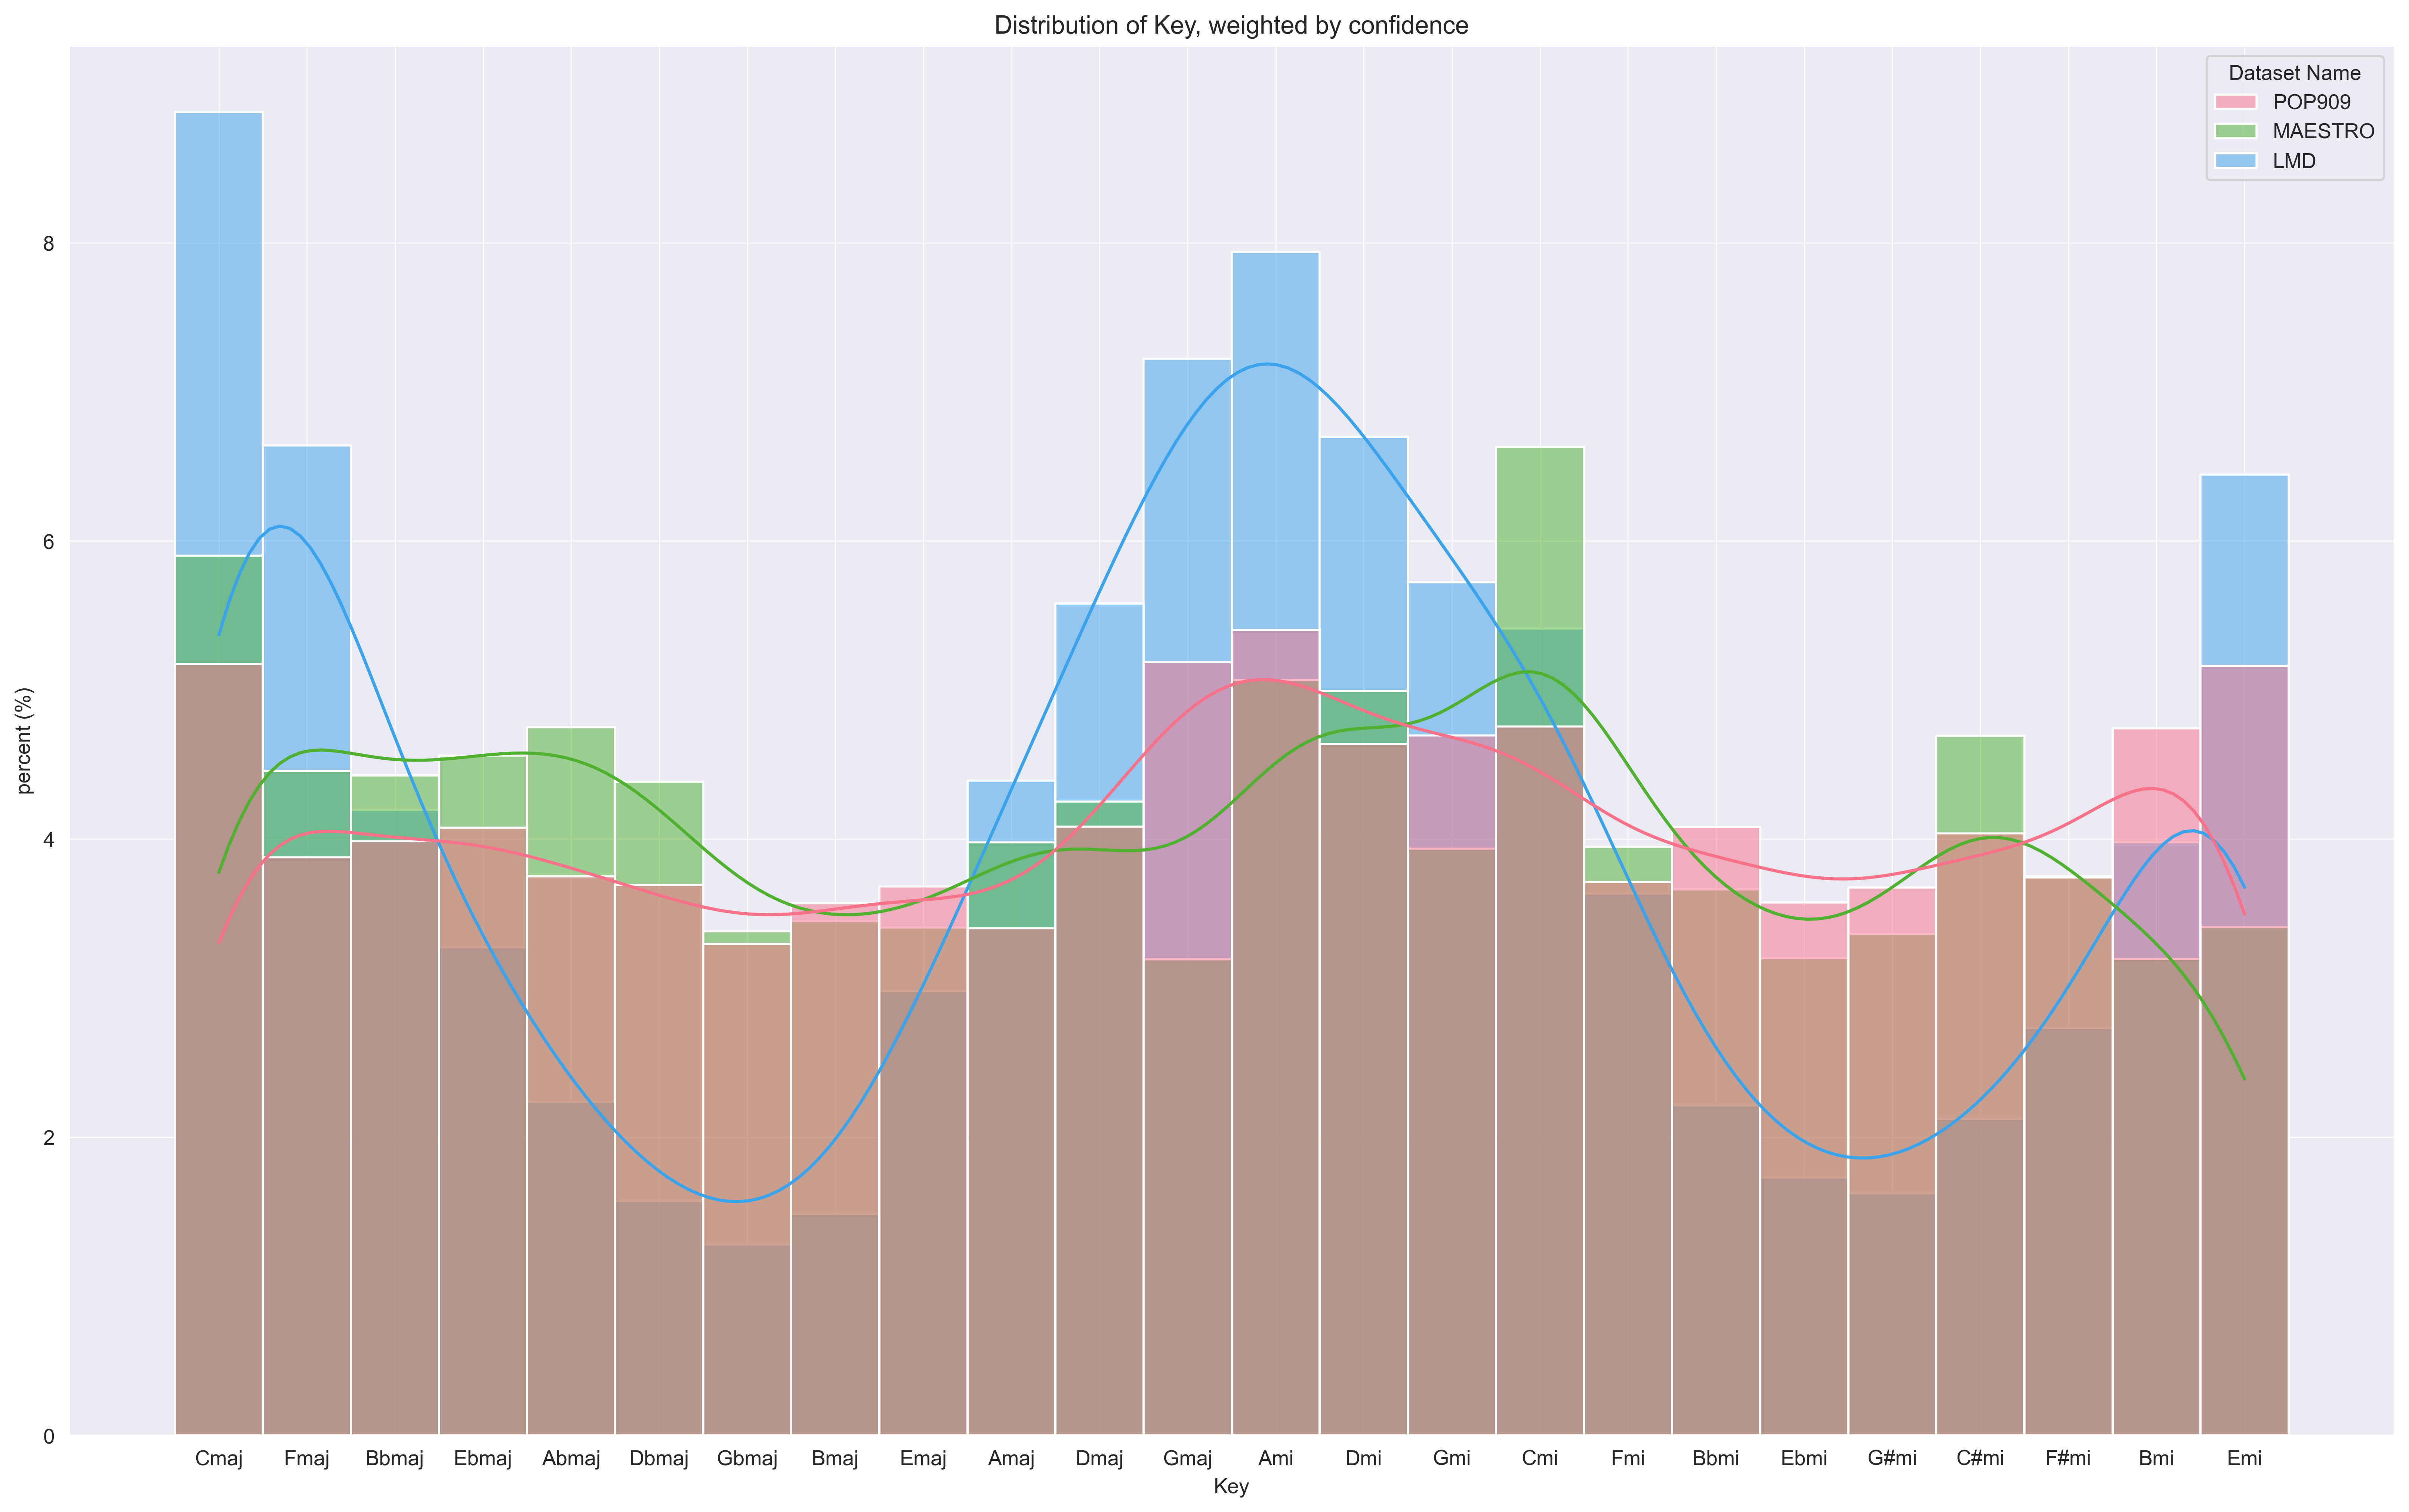

In [5]:
mic(mv.time_sig_dist(yscale='linear', stat='percent').df)
mic(mv.tempo_dist(stat='percent').df)
mv.key_dist(stat='percent');



2023-04-10 12:47:32|[Music Visualizer]::note_pitch_dist::music_visualize.py:495:INFO: Getting stats... 
2023-04-10 12:47:34|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


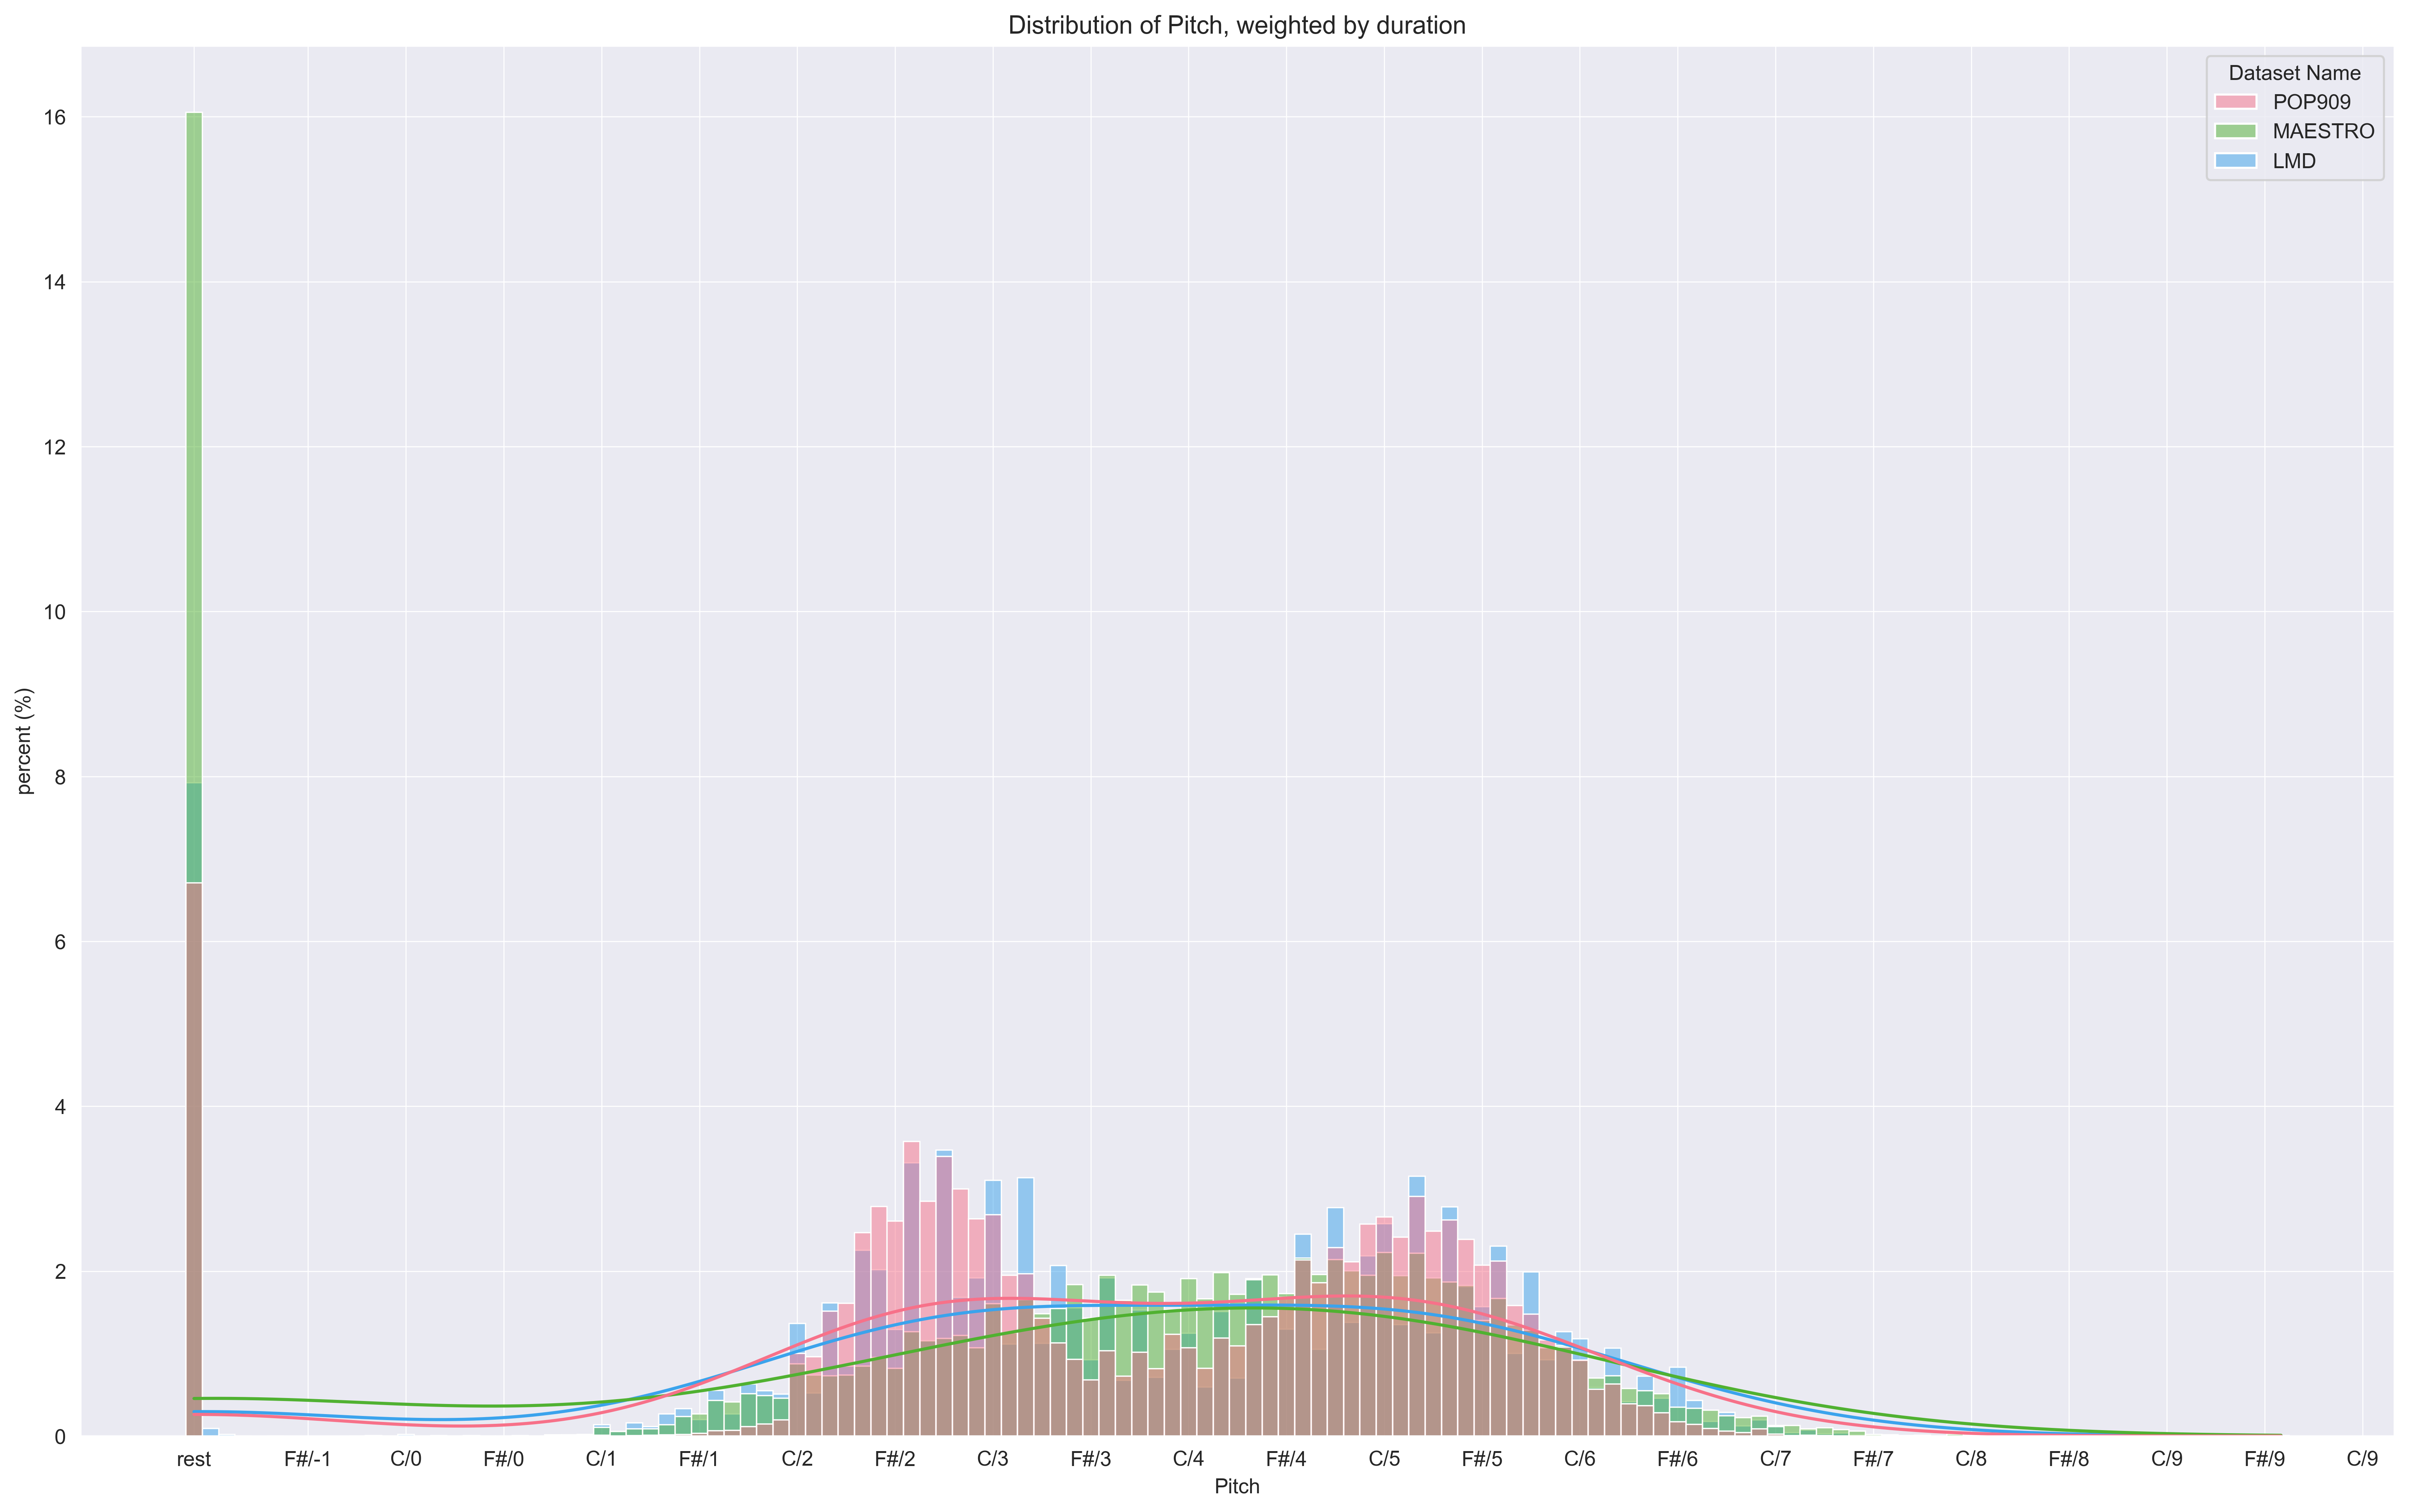

2023-04-10 12:47:37|[Music Visualizer]::note_duration_dist::music_visualize.py:535:INFO: Getting stats... 
2023-04-10 12:47:38|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


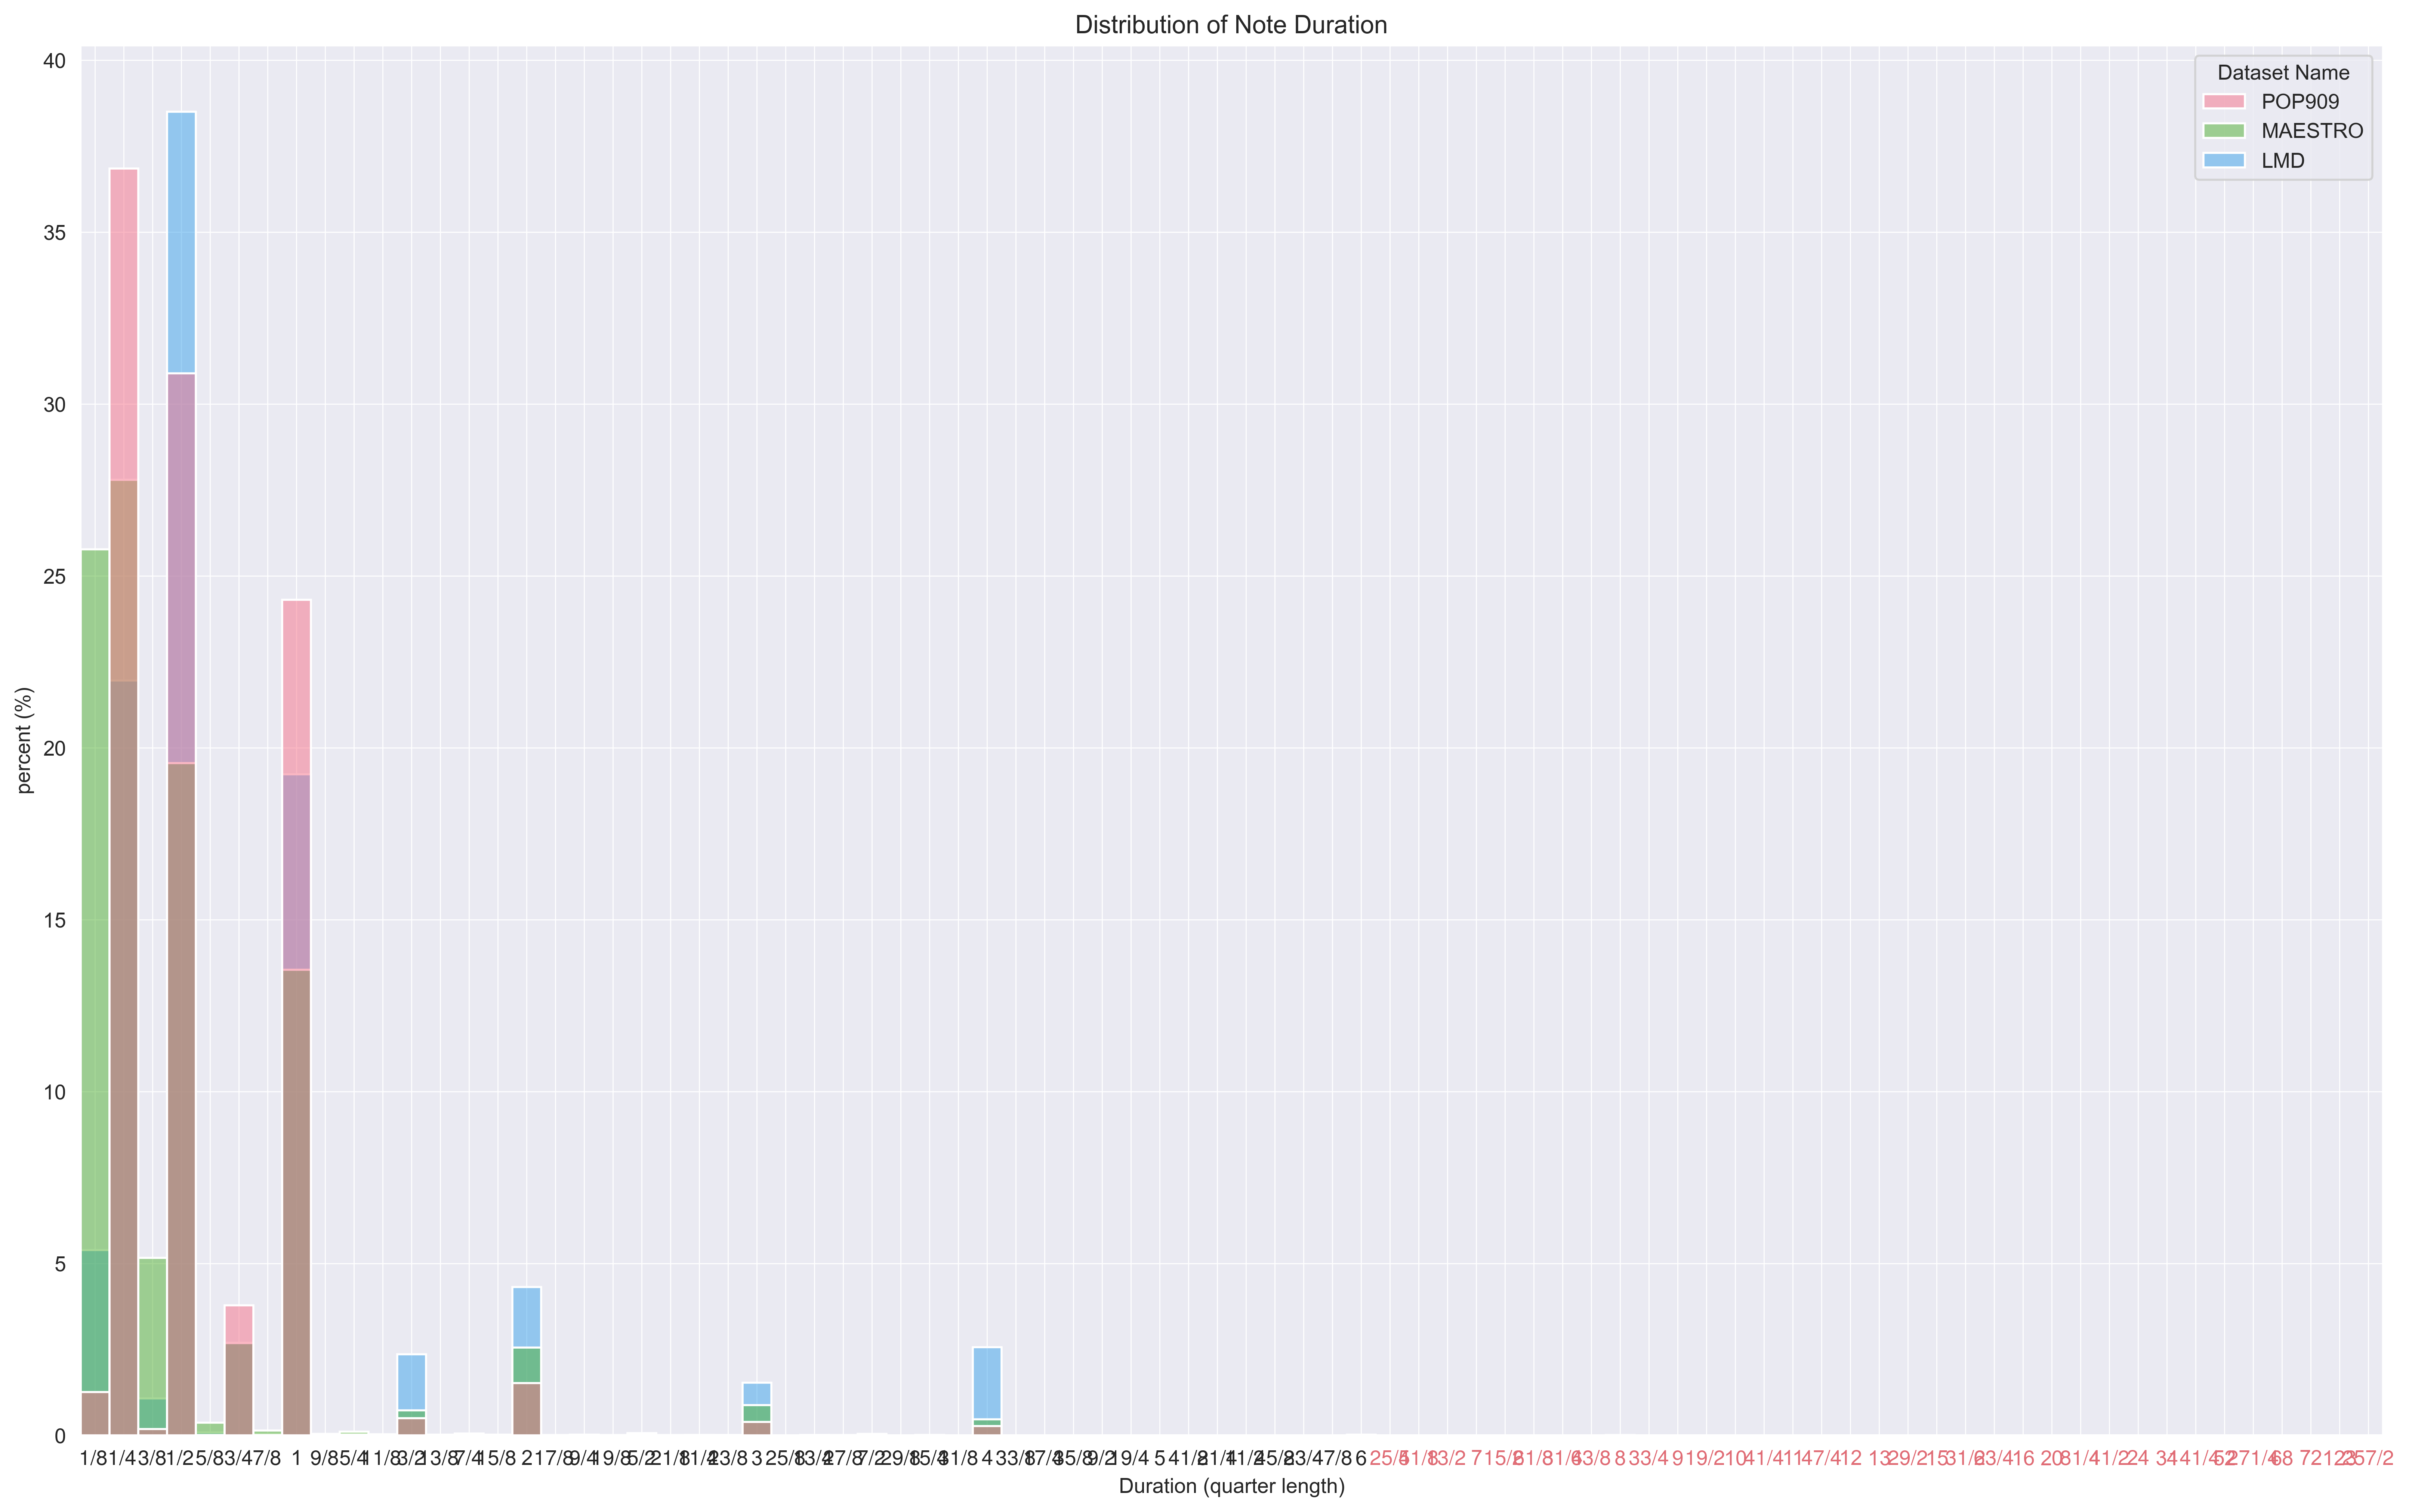

ic| mv.note_duration_dist(note_type='all', stat='percent').df:     duration    count dataset_name
                                                               0          1   253146       POP909
                                                               1        1/2   321805       POP909
                                                               2        1/4   383834       POP909
                                                               3        1/8    13128       POP909
                                                               4        3/4    39415       POP909
                                                               5        3/8     1921       POP909
                                                               6          2    15766       POP909
                                                               7        3/2     5162       POP909
                                                               8          3     4086       POP909
                    

2023-04-10 12:47:43|[Music Visualizer]::note_duration_dist::music_visualize.py:535:INFO: Getting stats... 
2023-04-10 12:47:43|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


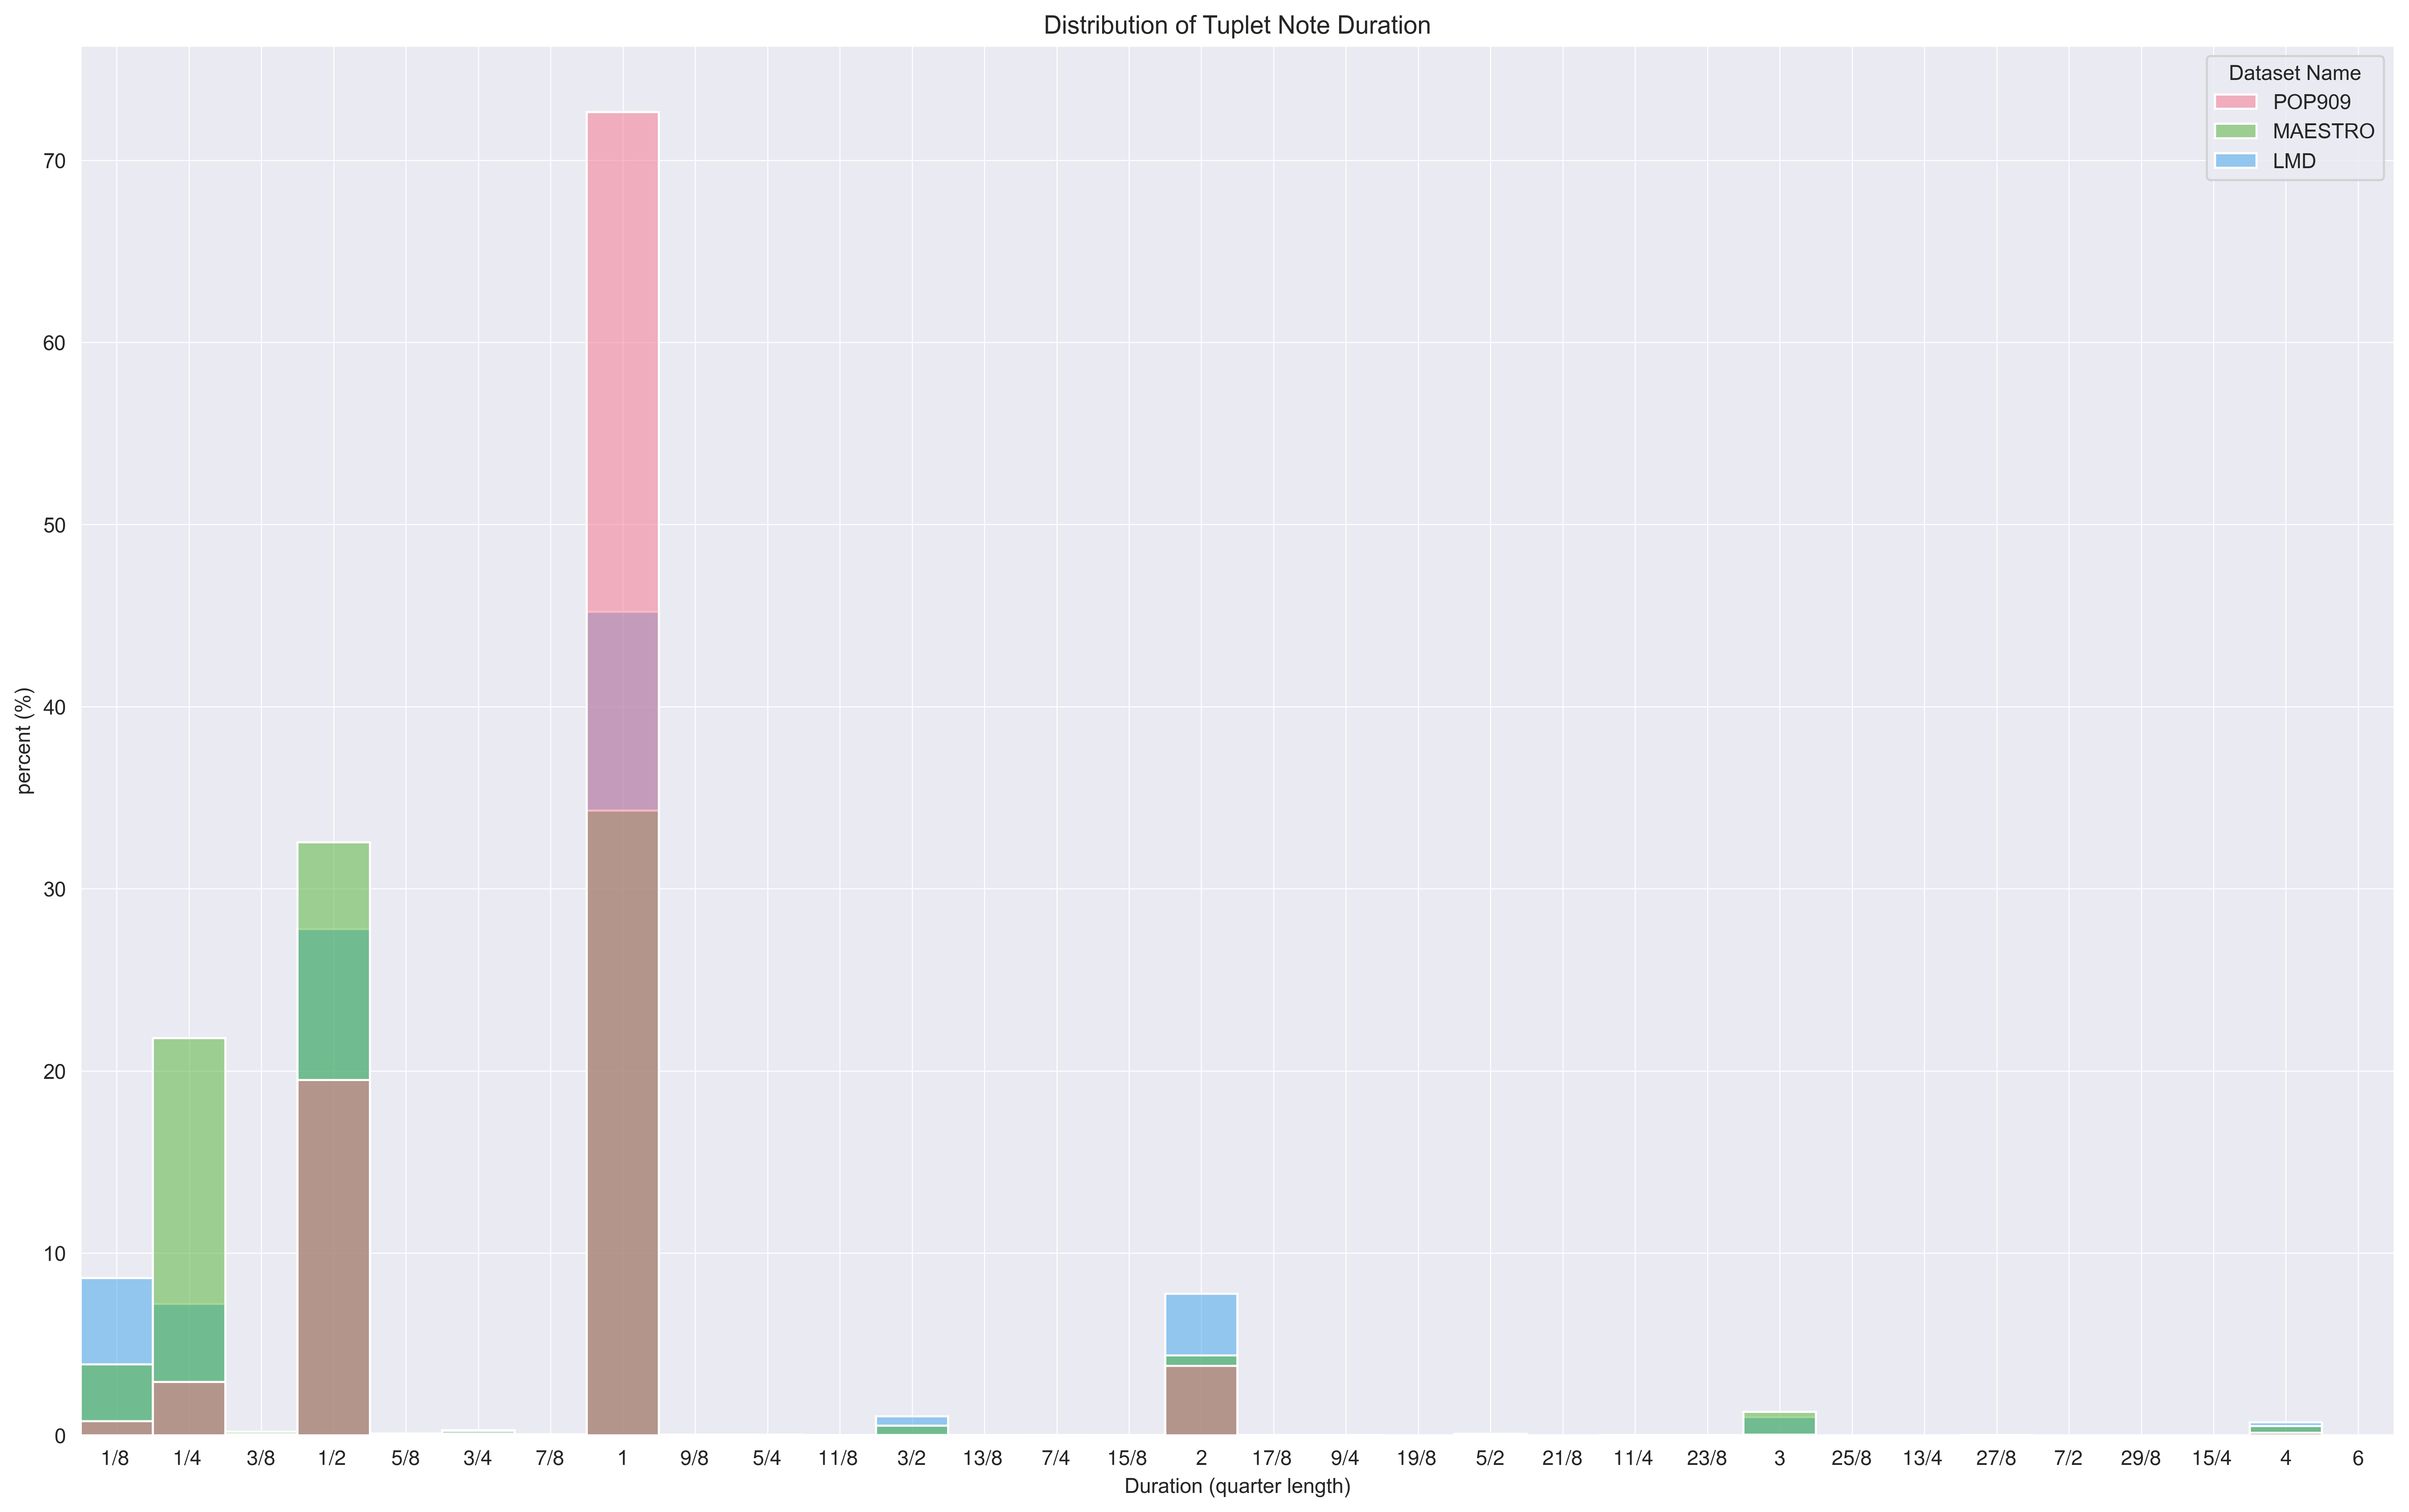

ic| mv.note_duration_dist(note_type='tuplet', stat='percent').df:    duration   count dataset_name
                                                                  0         1    3975       POP909
                                                                  1       1/2    1067       POP909
                                                                  2         2     208       POP909
                                                                  3       1/8      42       POP909
                                                                  4       1/4     160       POP909
                                                                  5       5/8       1       POP909
                                                                  6       3/8       3       POP909
                                                                  7         3       2       POP909
                                                                  8       3/4       5       POP909
          

In [6]:
mv.note_pitch_dist(stat='percent')
mic(mv.note_duration_dist(note_type='all', stat='percent').df)
mic(mv.note_duration_dist(note_type='tuplet', stat='percent').df);



2023-04-10 12:47:46|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


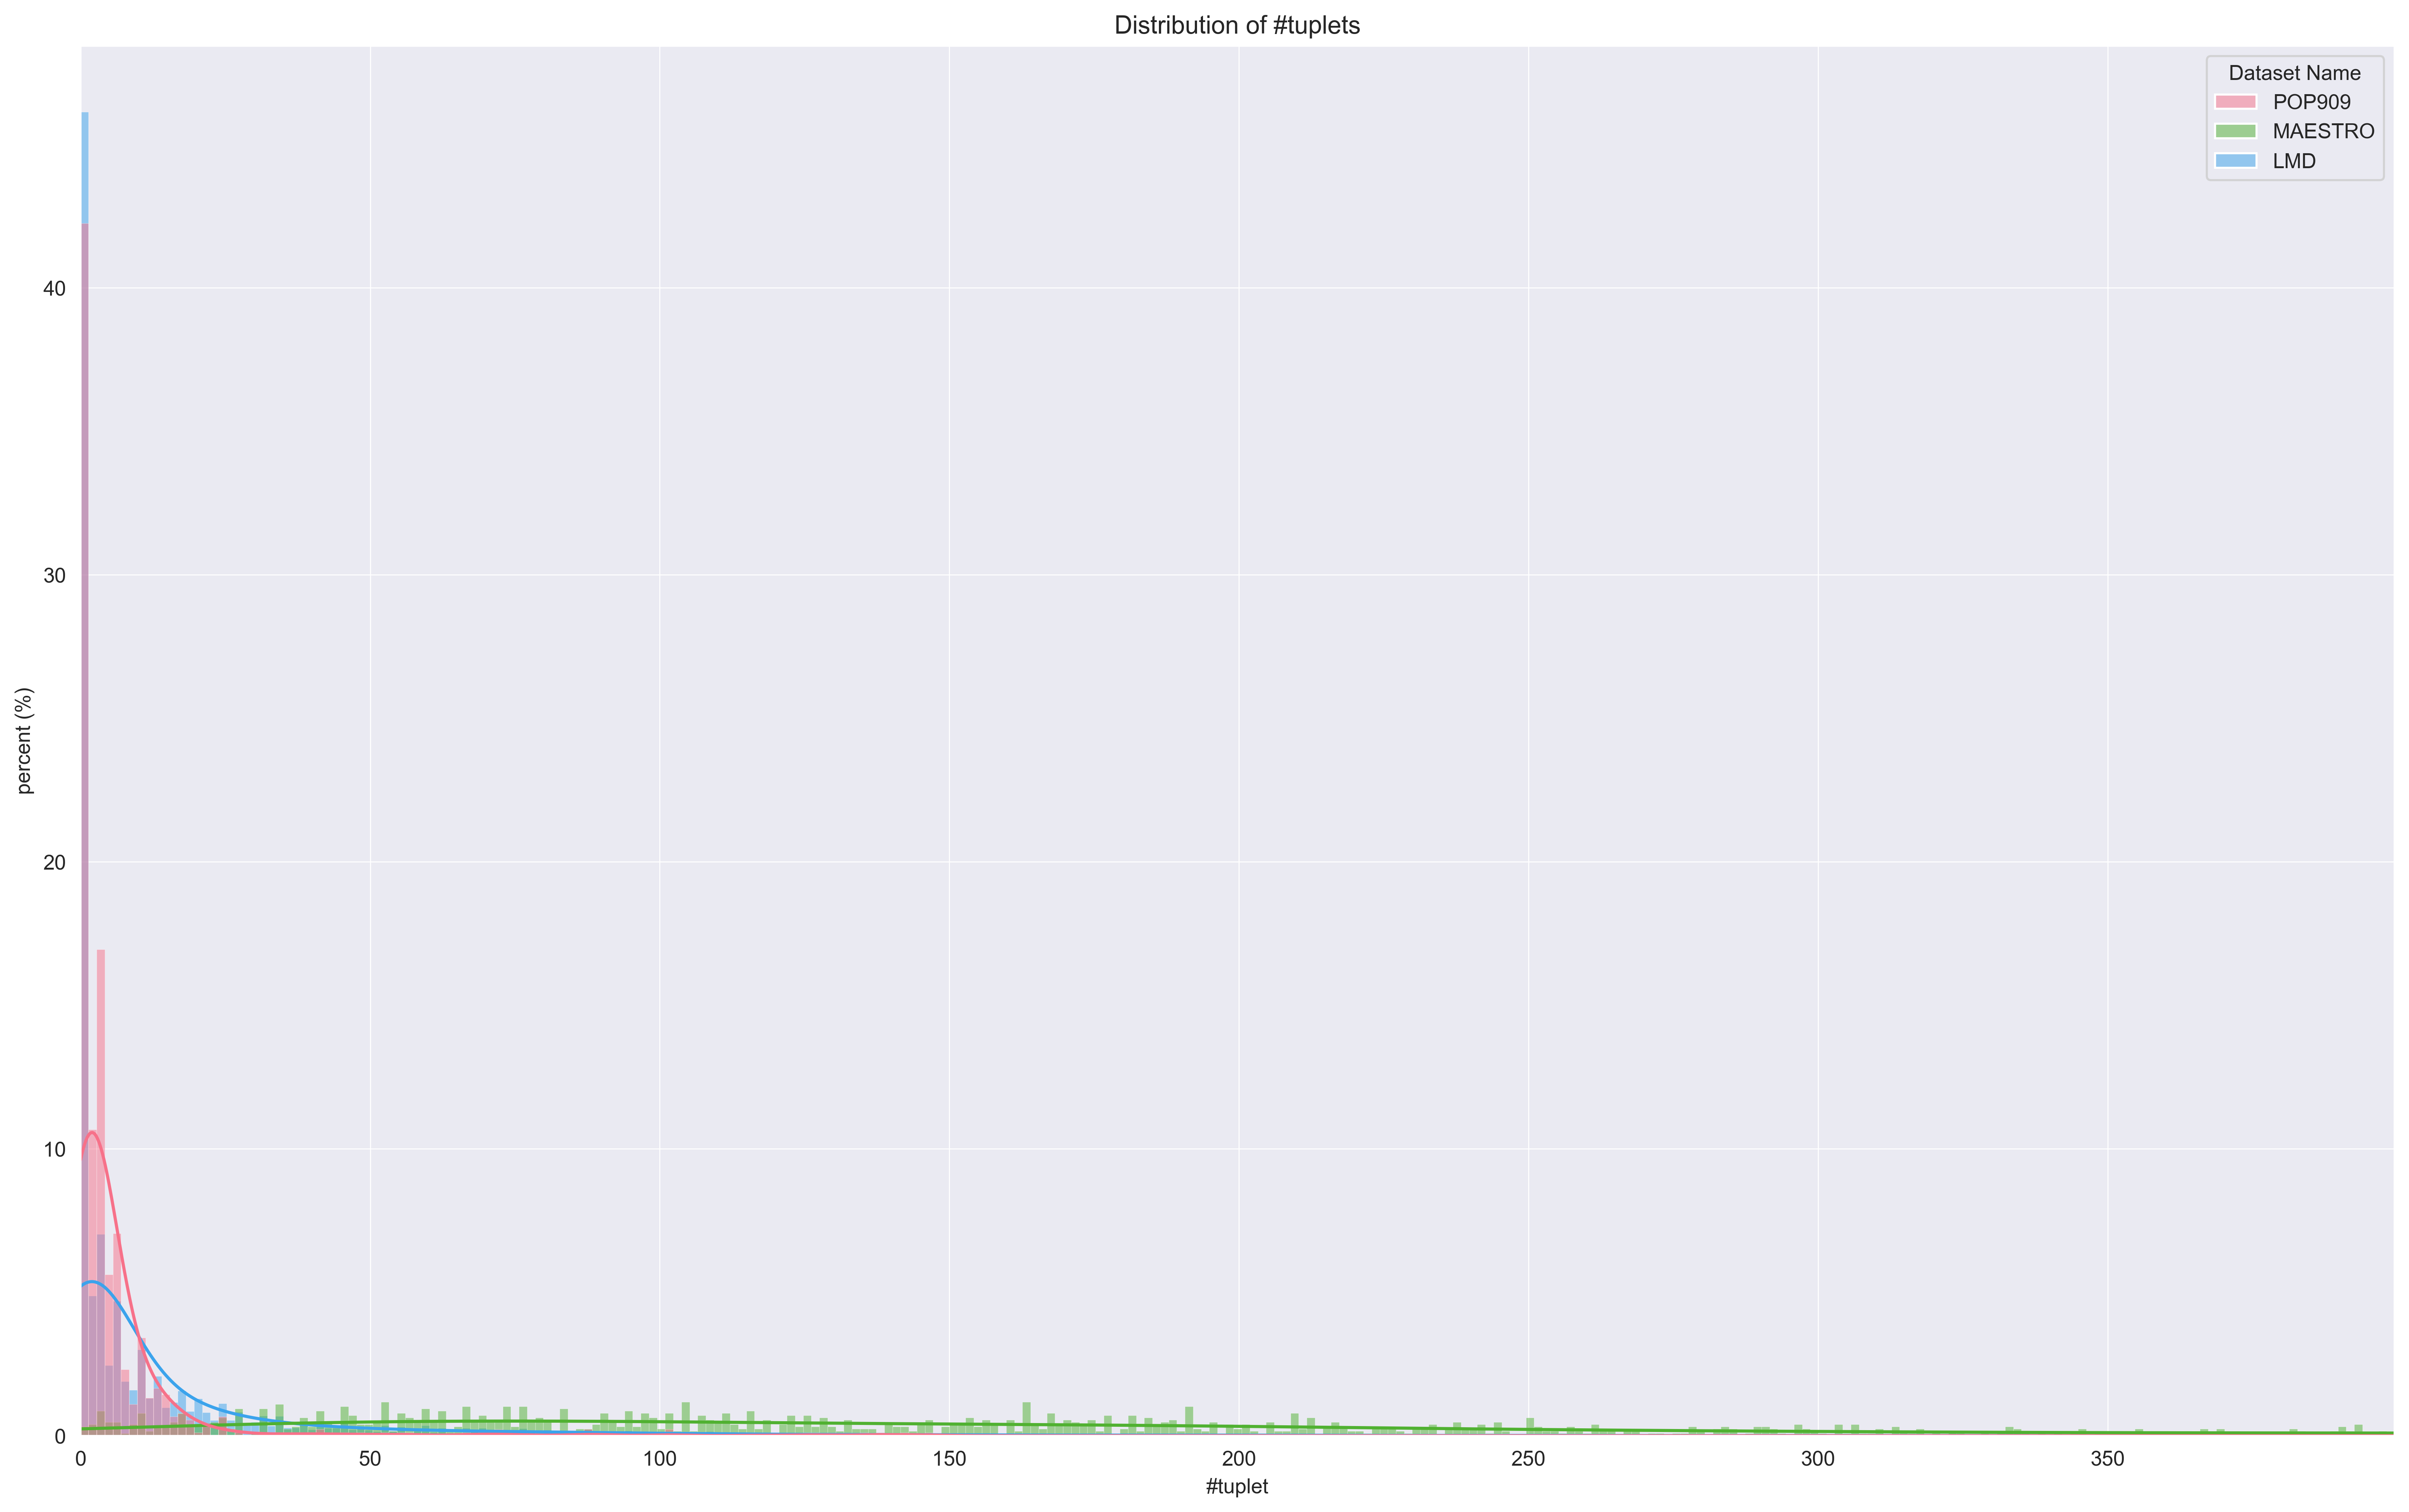

ic| mv.tuplet_count_dist(**args).df:     dataset_name  n_tup  count
                                     0            LMD      0   7149
                                     1            LMD      1    999
                                     2            LMD      2    861
                                     3            LMD      3    625
                                     4            LMD      4    614
                                     5            LMD      5    432
                                     6            LMD      6    478
                                     7            LMD      7    351
                                     8            LMD      8    334
                                     9            LMD      9    280
                                     10           LMD     10    299
                                     11           LMD     11    231
                                     12           LMD     12    229
                                     13         

2023-04-10 12:47:59|[Music Visualizer]::tuplet_n_note_dist::music_visualize.py:351:INFO: Getting stats... 
2023-04-10 12:47:59|[Music Visualizer]::hist_wrapper::music_visualize.py:281:INFO: Plotting... 


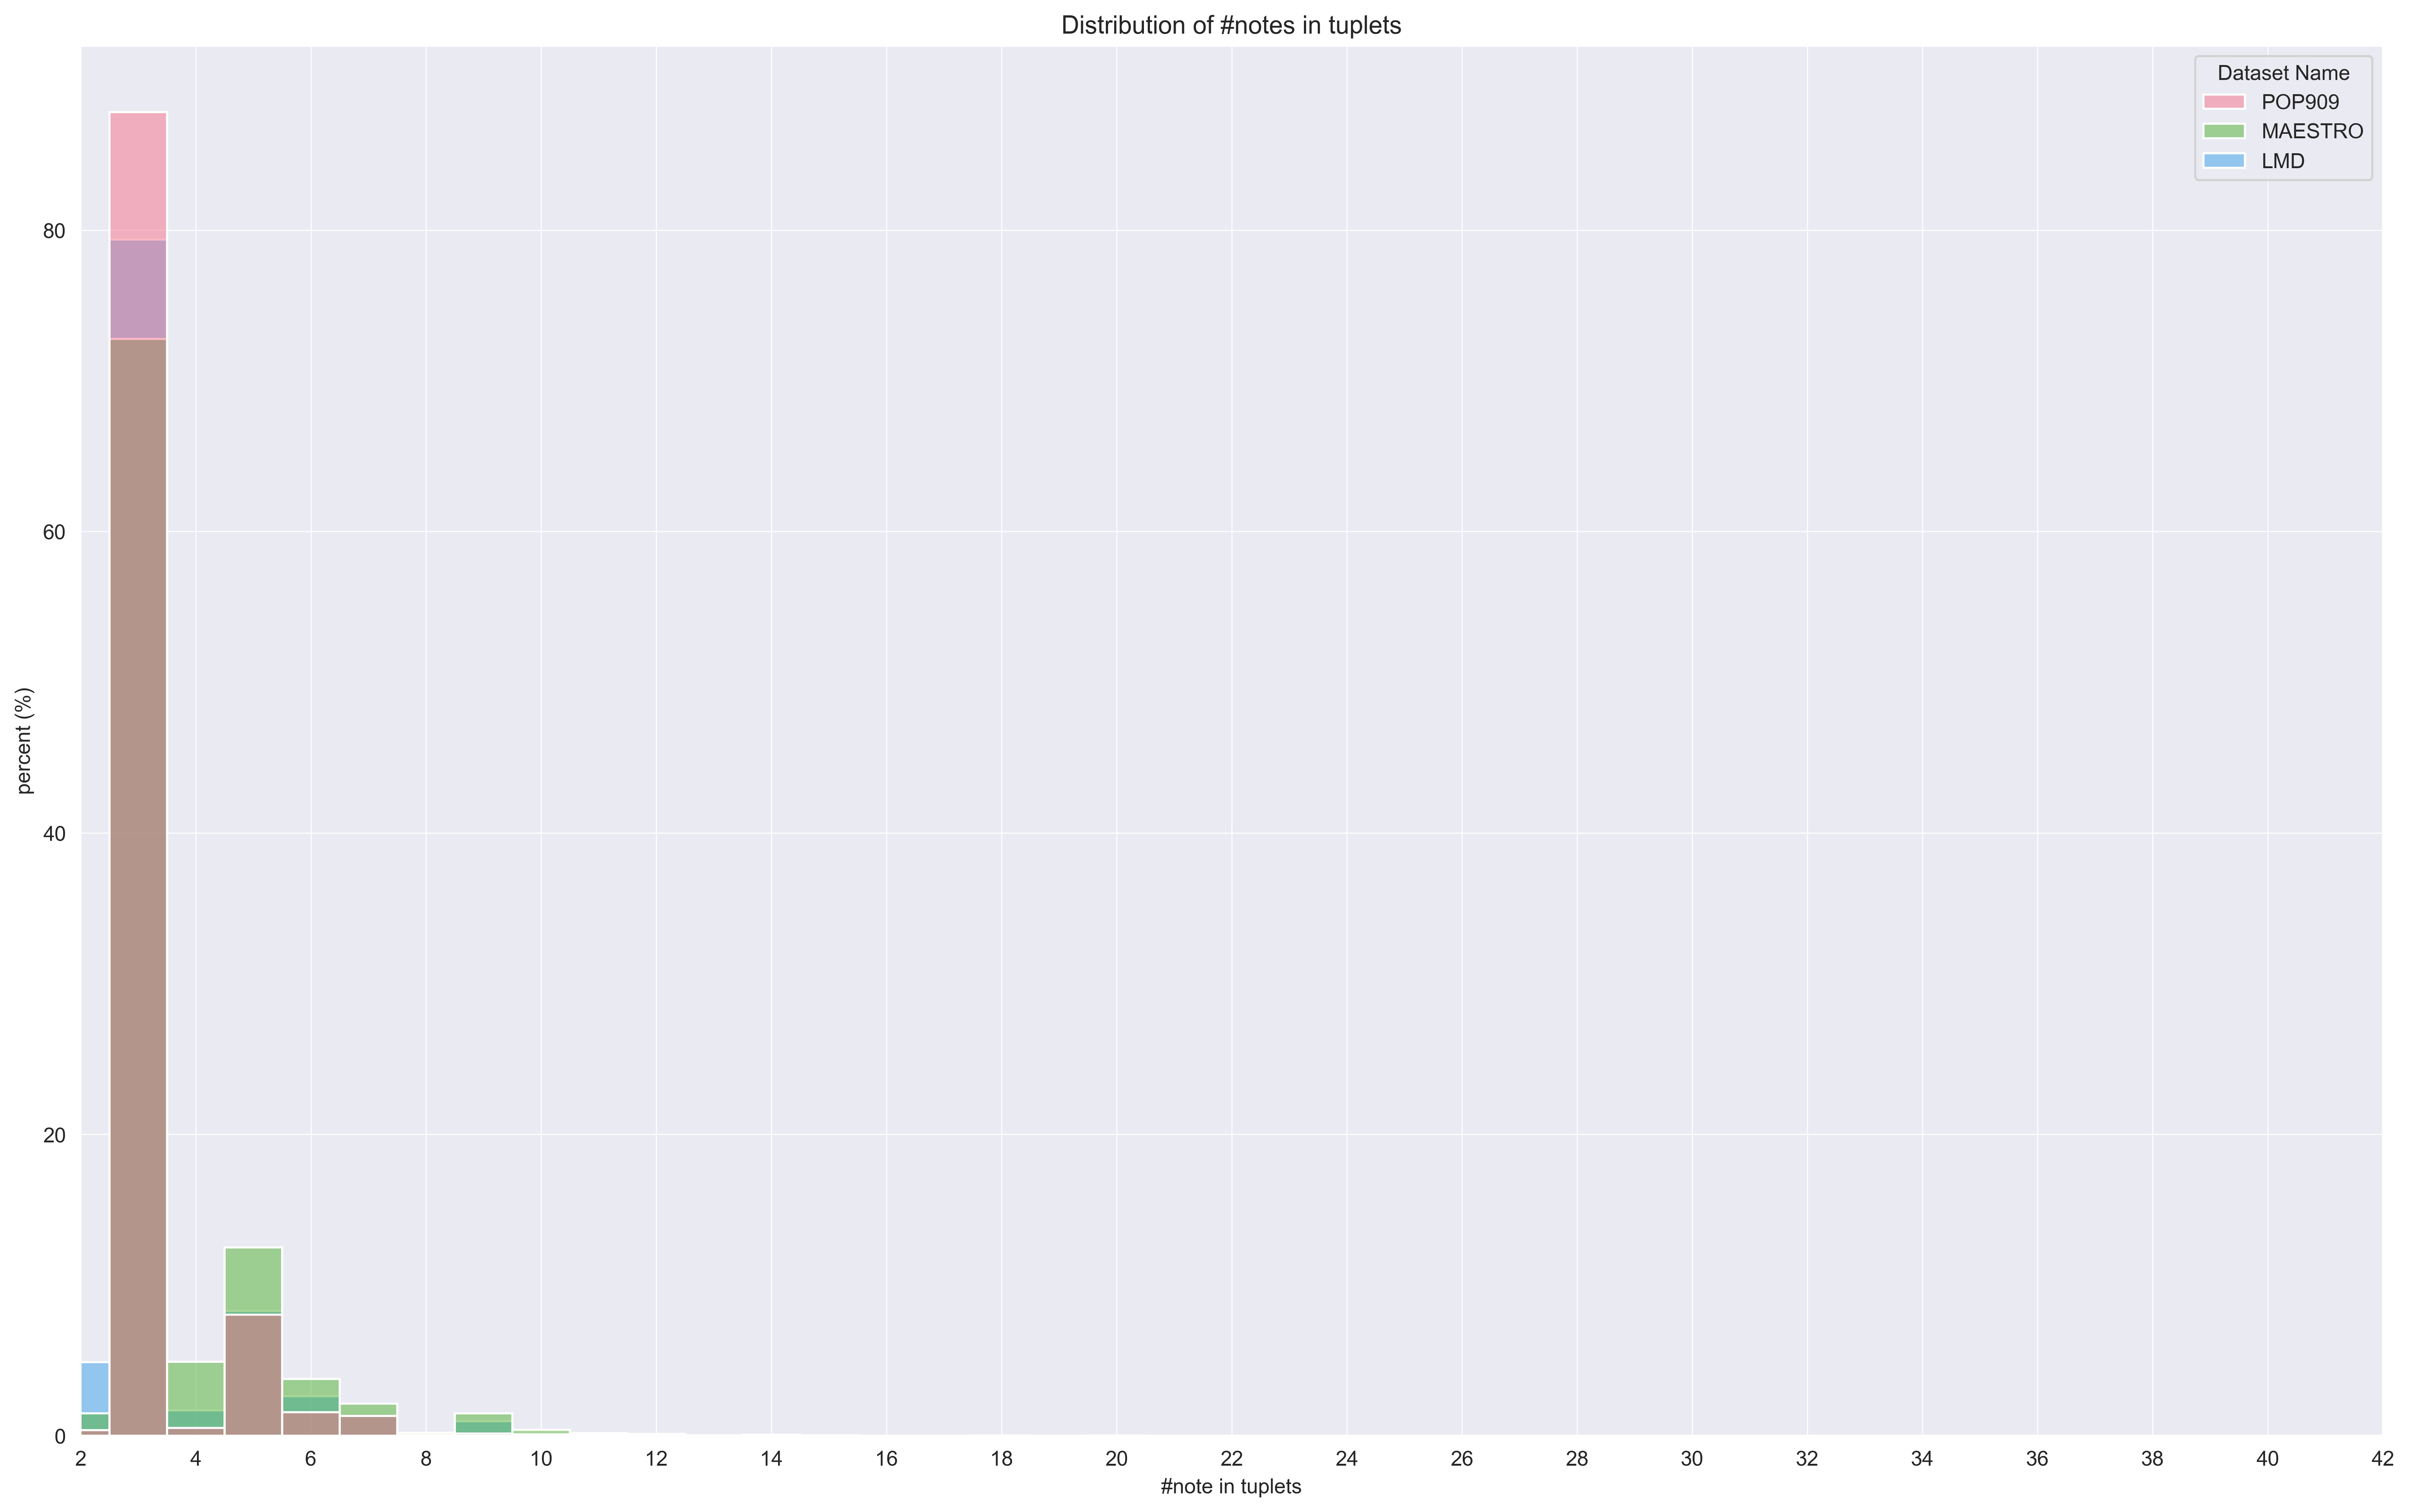

ic| mv.tuplet_n_note_dist(**args).df:     n_tuplet_note   count dataset_name
                                      0               3    4806       POP909
                                      1               5     440       POP909
                                      2               2      20       POP909
                                      3               4      28       POP909
                                      4               6      86       POP909
                                      5               8       3       POP909
                                      6               7      72       POP909
                                      7               9       8       POP909
                                      8              10       5       POP909
                                      9              13       1       POP909
                                      10             11       3       POP909
                                      11              3  168000      MAESTRO

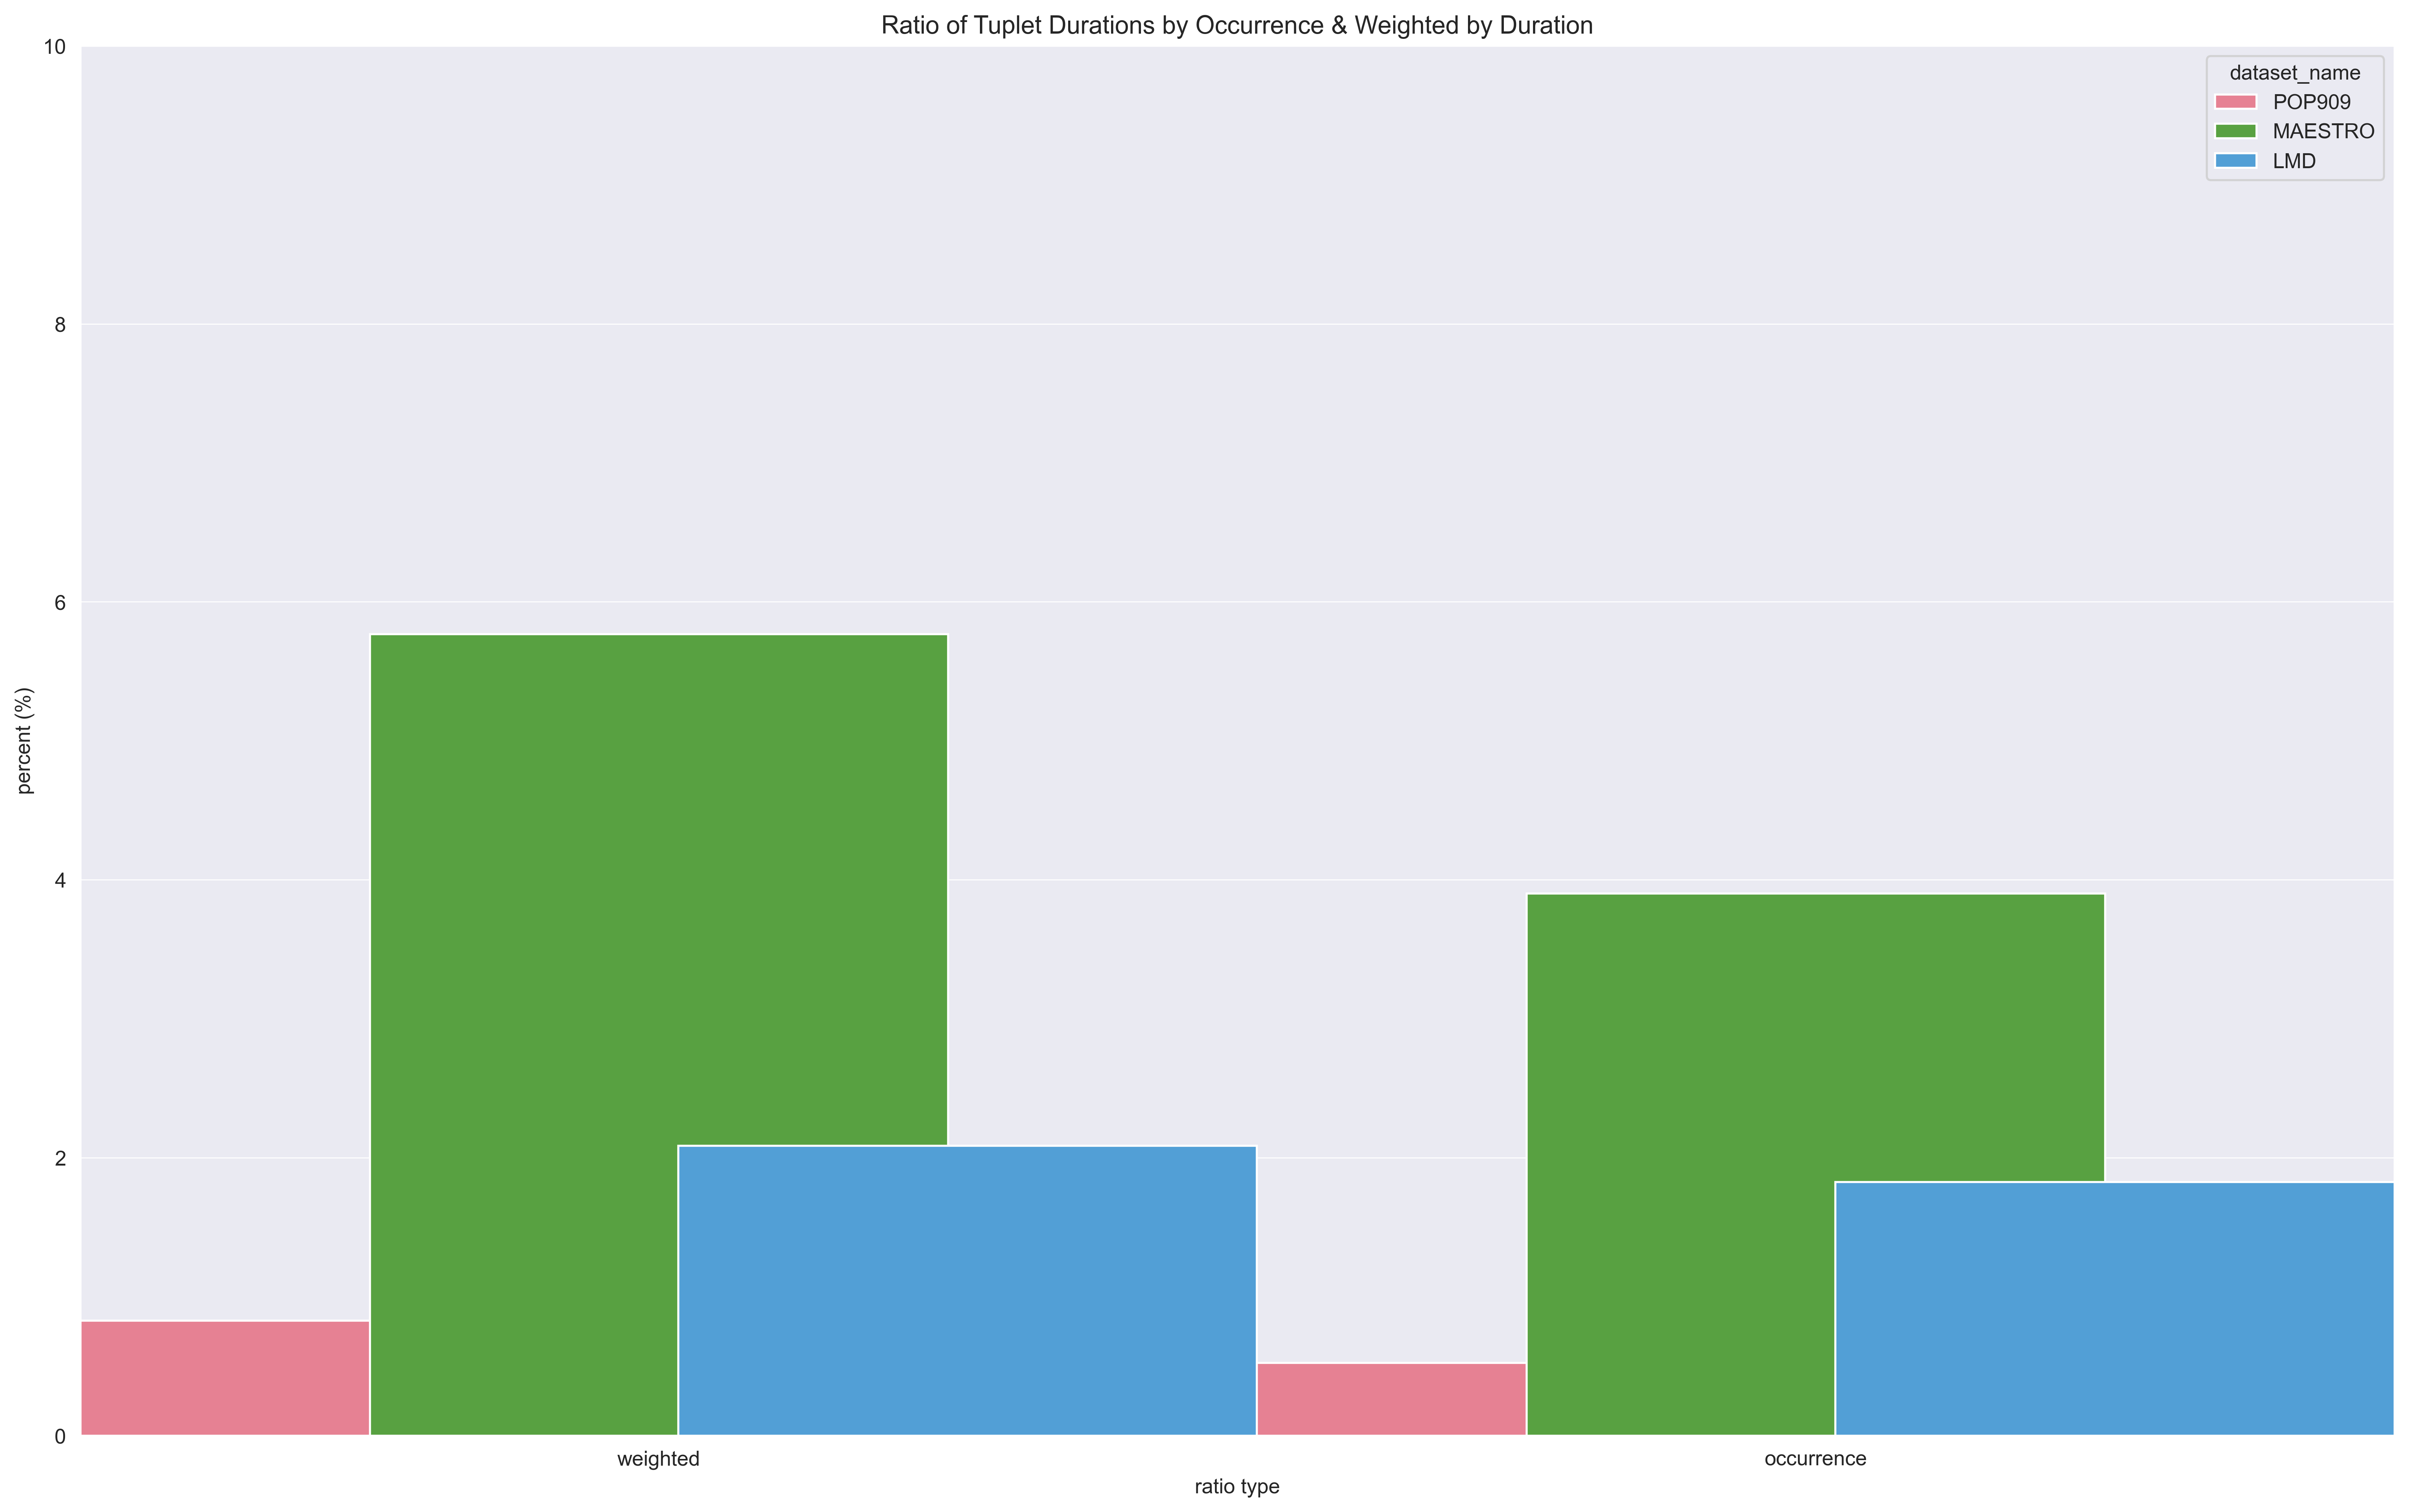

ic| mv.tuplet_duration_ratio().df:   dataset_name  ratio        kind           x     y
                                   0          LMD   2.09    weighted    weighted  2.09
                                   1      MAESTRO   5.77    weighted    weighted  5.77
                                   2       POP909   0.83    weighted    weighted  0.83
                                   3          LMD   1.83  occurrence  occurrence  1.83
                                   4      MAESTRO   3.90  occurrence  occurrence  3.90
                                   5       POP909   0.53  occurrence  occurrence  0.53


In [7]:
mic(mv.tuplet_count_dist(**args).df)
mic(mv.tuplet_n_note_dist(**args).df)
mic(mv.tuplet_duration_ratio().df);


ic| len(null_count): 560
ic| mv.token_coverage_dist(ratio=0.99).meta: {'LMD': {'counter': Counter({'d_1/2': 6801048,
                                                                          'd_1/4': 3877347,
                                                                          'd_1': 3395861,
                                                                          '<bar>': 1798250,
                                                                          '<melody>': 1798250,
                                                                          '<bass>': 1798250,
                                                                          'p_r': 1204894,
                                                                          'd_1/8': 951028,
                                                                          'd_2': 762584,
                                                                          'p_10/2_A': 623571,
                                                         

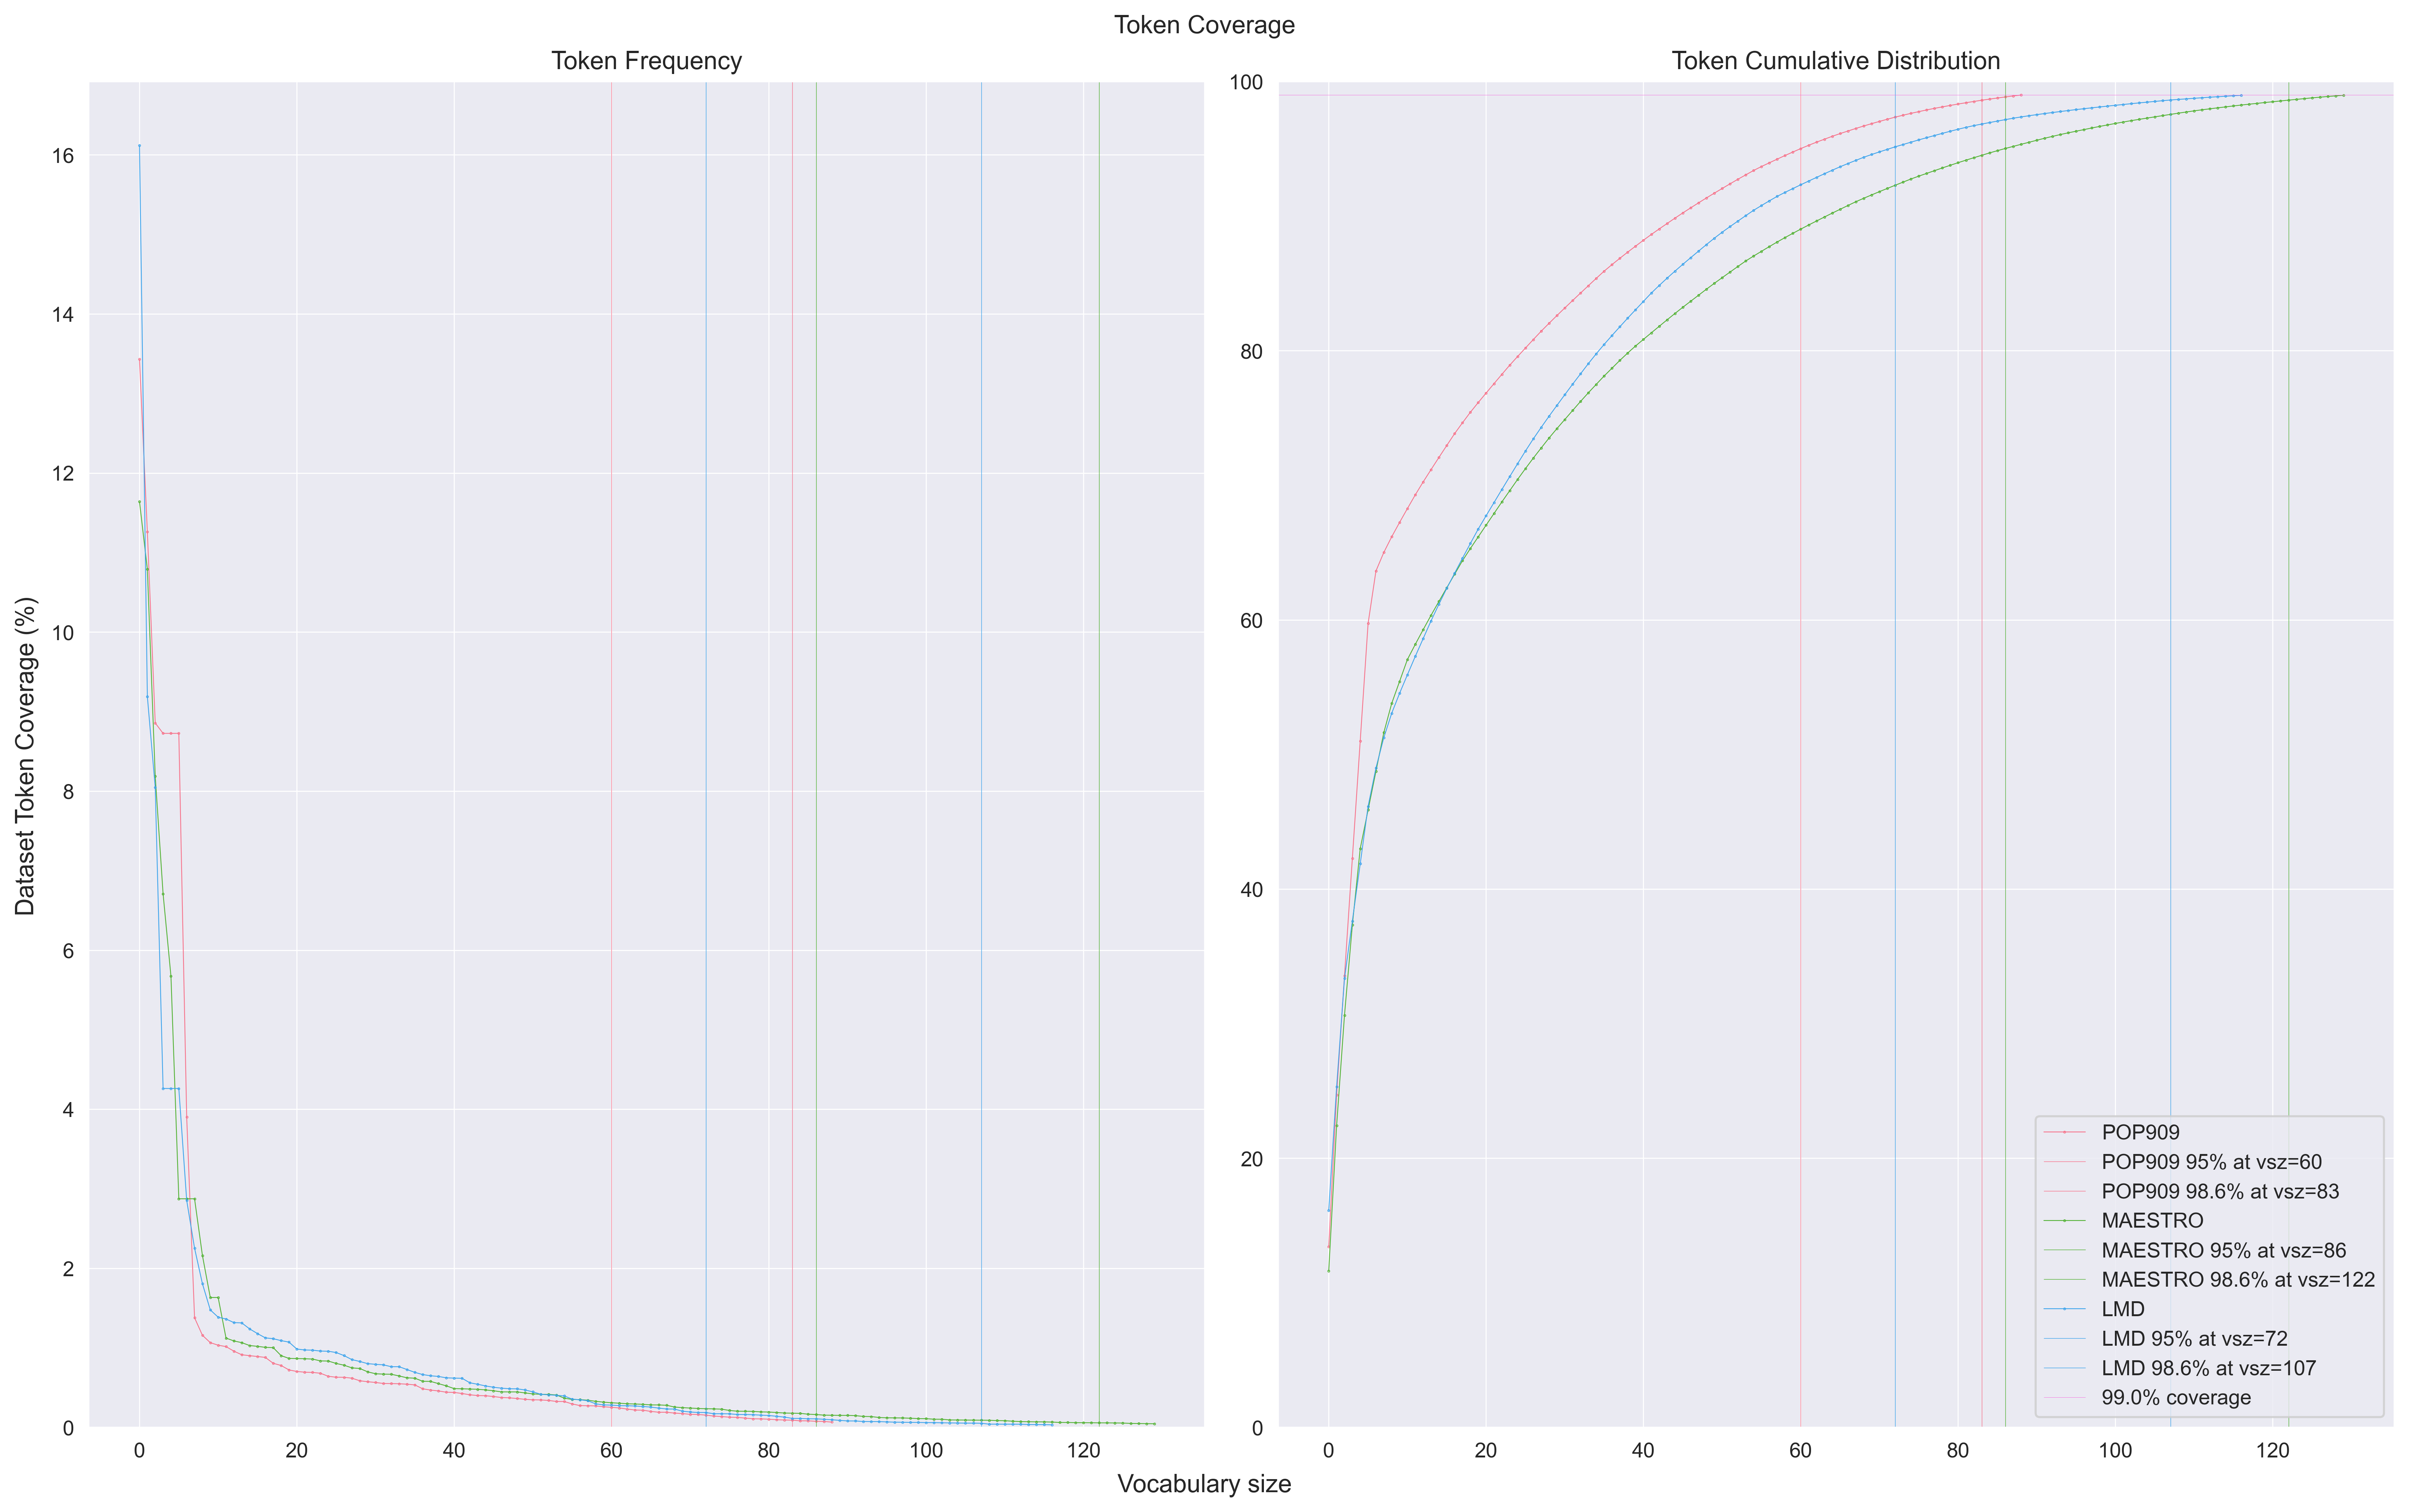

In [8]:
mic(mv.token_coverage_dist(ratio=0.99).meta);



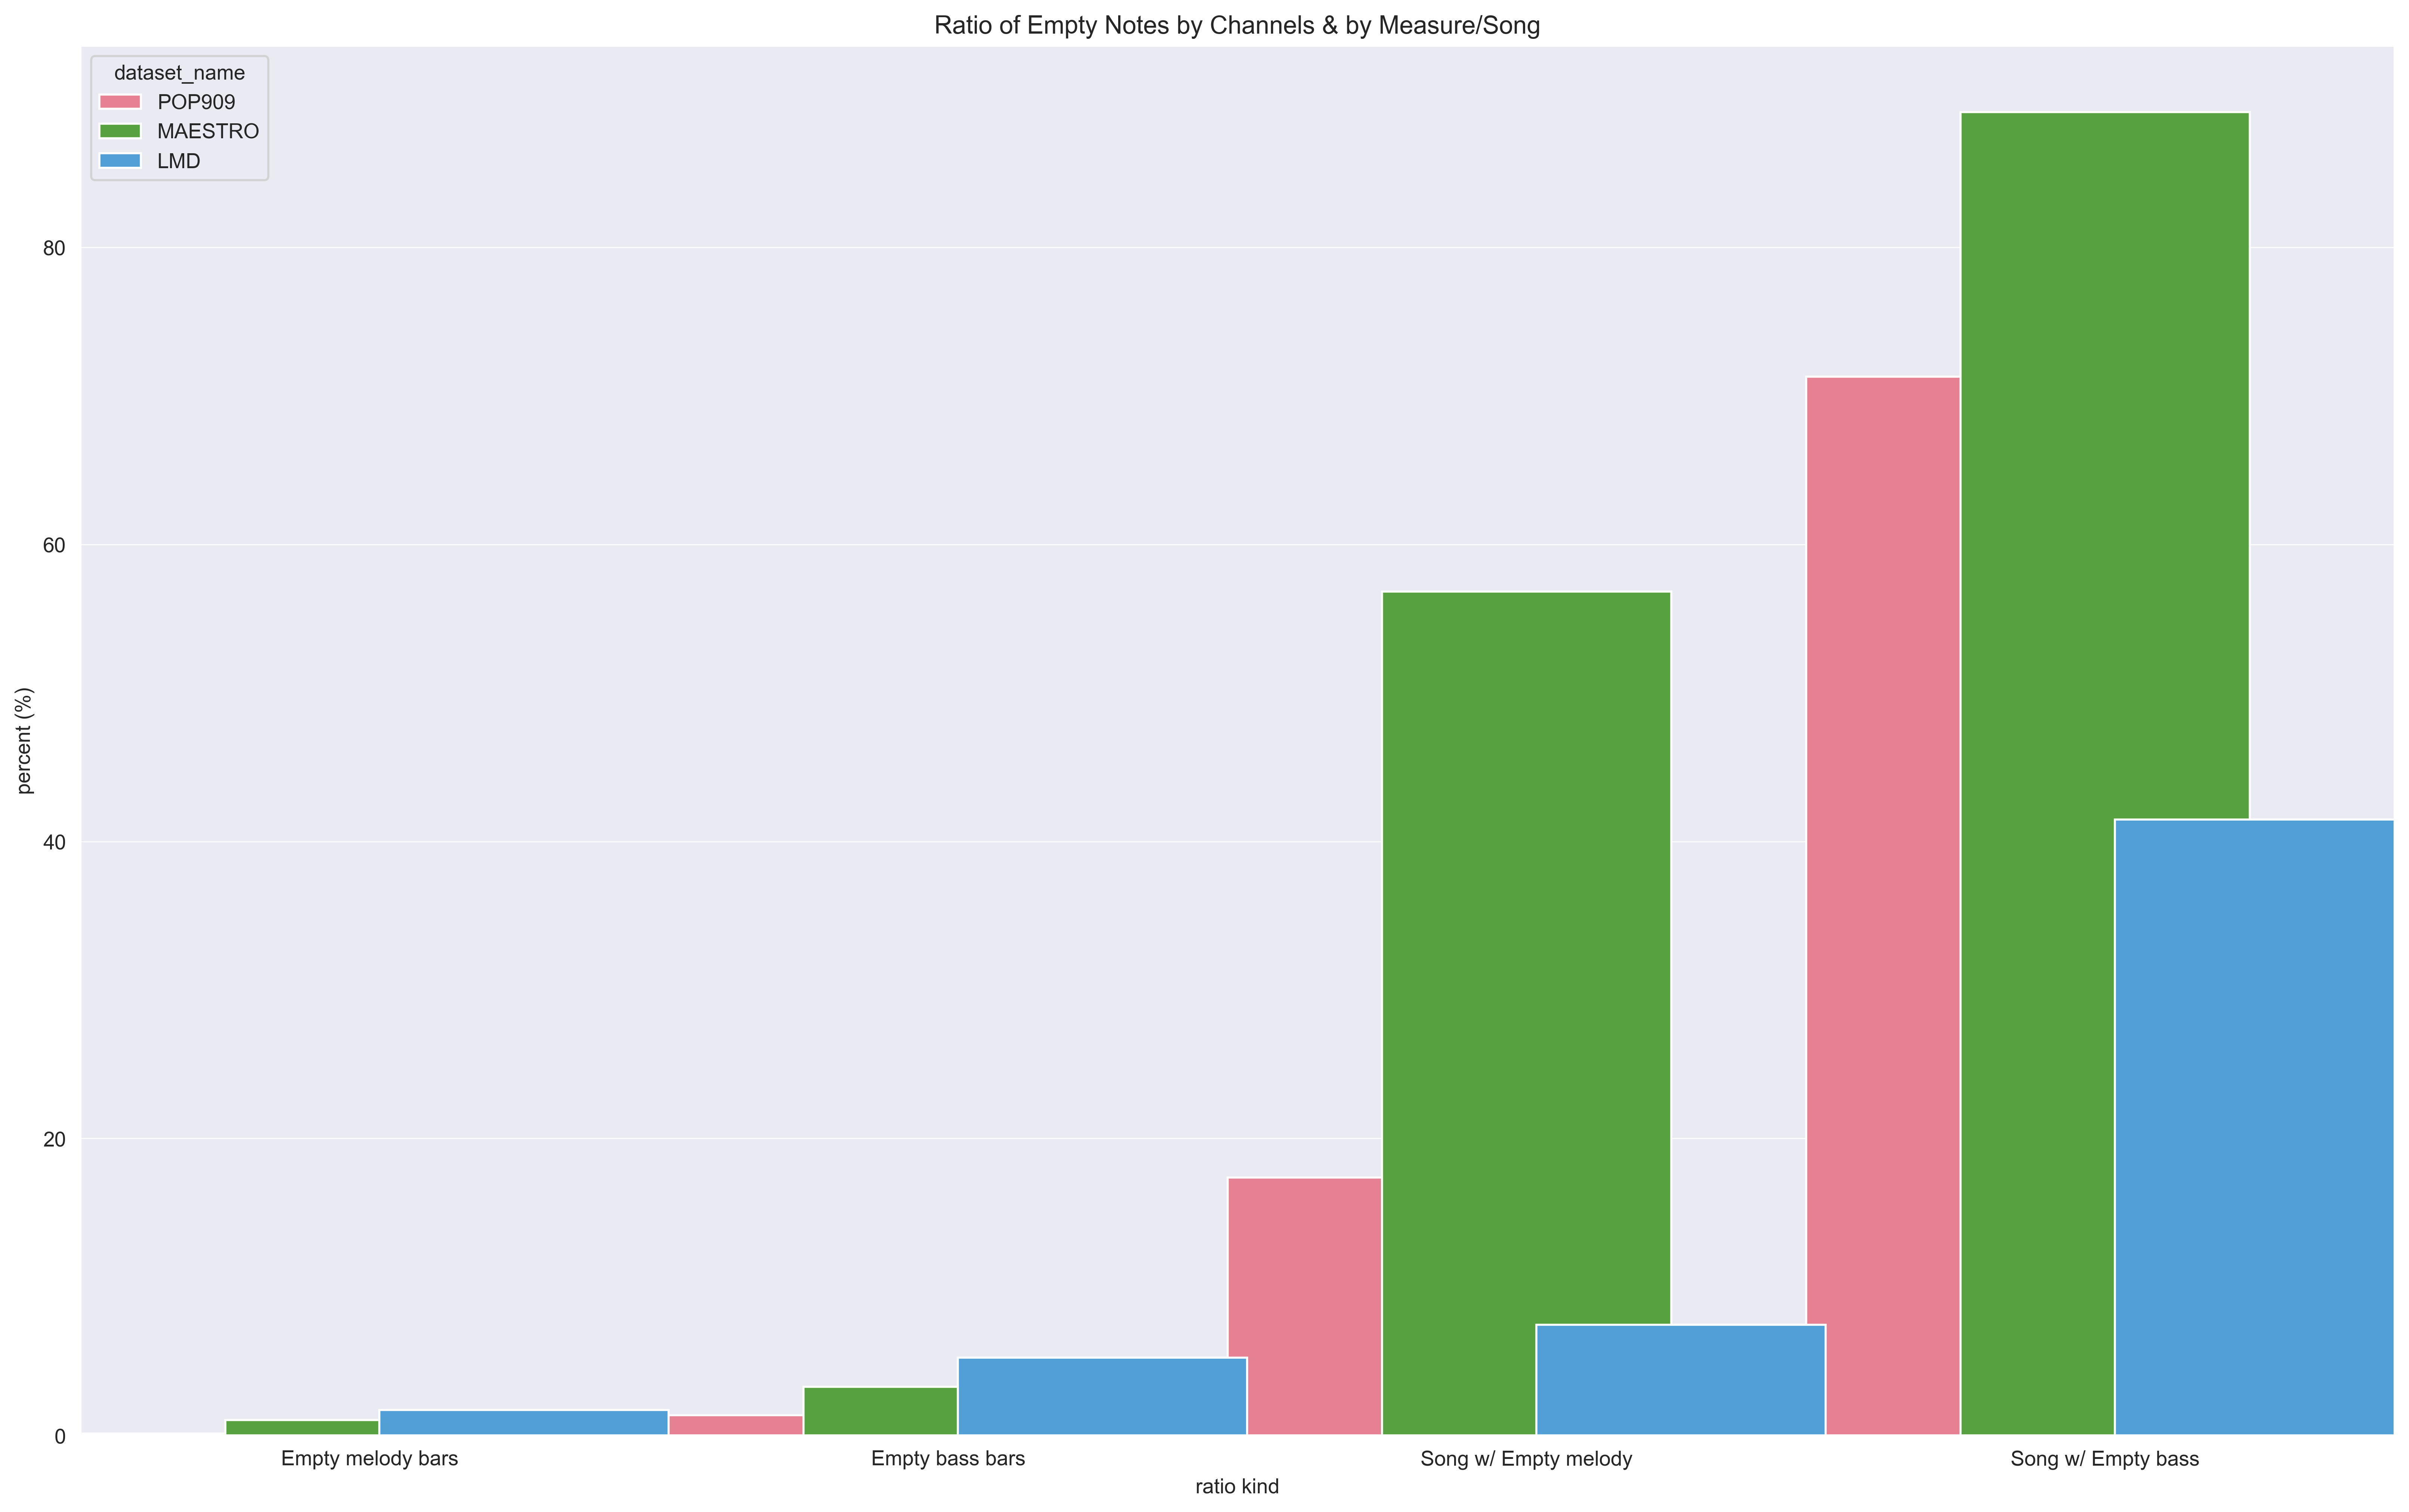

ic| mv.empty_channel_ratio().df:                    ratio  count dataset_name  percent                     x      y
                                 0      Empty melody bars    359       POP909     0.14     Empty melody bars   0.14
                                 1        Empty bass bars   3441       POP909     1.38       Empty bass bars   1.38
                                 2      Empty melody bars   4224      MAESTRO     1.04     Empty melody bars   1.04
                                 3        Empty bass bars  13302      MAESTRO     3.28       Empty bass bars   3.28
                                 4      Empty melody bars  30959          LMD     1.72     Empty melody bars   1.72
                                 5        Empty bass bars  94498          LMD     5.25       Empty bass bars   5.25
                                 6   Song w/ Empty melody    158       POP909    17.38  Song w/ Empty melody  17.38
                                 7     Song w/ Empty bass    648       P

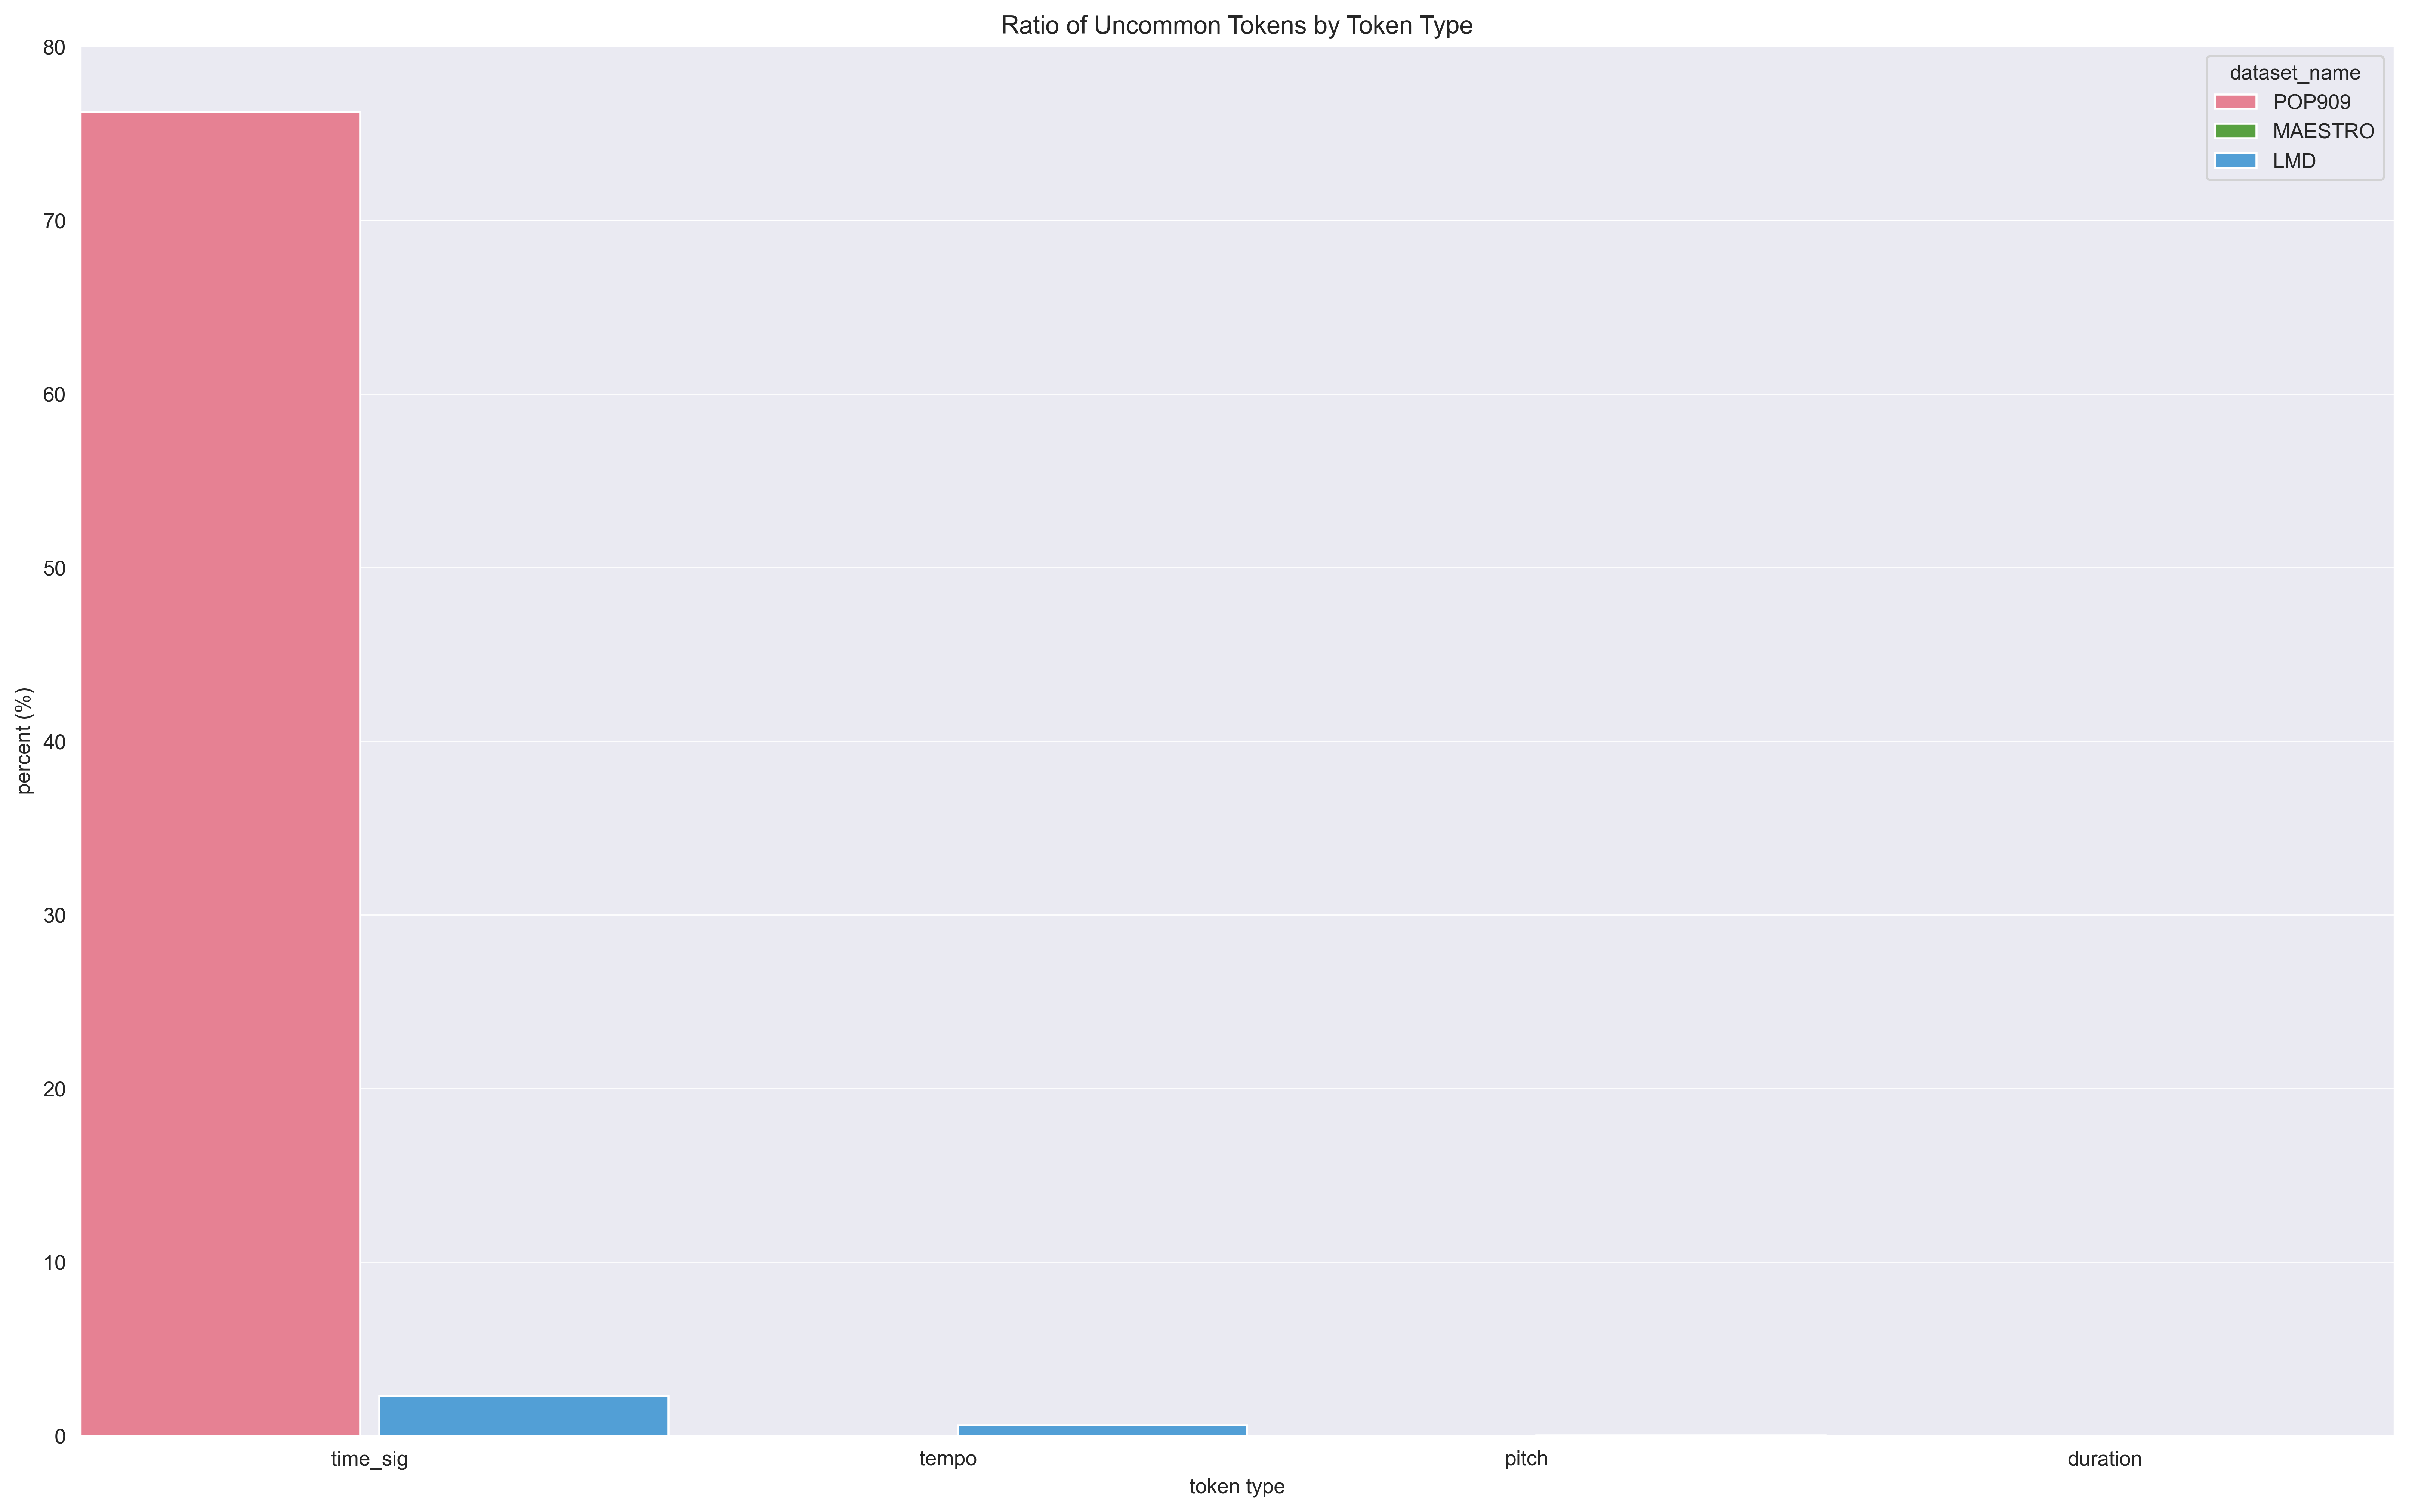

ic| mv.rare_token_ratio().df:         kind dataset_name     ratio         x         y
                              0   time_sig       POP909  7.62e+01  time_sig  7.62e+01
                              1      tempo       POP909  0.00e+00     tempo  0.00e+00
                              2      pitch       POP909  0.00e+00     pitch  0.00e+00
                              3   duration       POP909  0.00e+00  duration  0.00e+00
                              4   time_sig      MAESTRO  0.00e+00  time_sig  0.00e+00
                              5      tempo      MAESTRO  0.00e+00     tempo  0.00e+00
                              6      pitch      MAESTRO  0.00e+00     pitch  0.00e+00
                              7   duration      MAESTRO  0.00e+00  duration  0.00e+00
                              8   time_sig          LMD  2.29e+00  time_sig  2.29e+00
                              9      tempo          LMD  6.00e-01     tempo  6.00e-01
                              10     pitch          LM

In [9]:
mic(mv.empty_channel_ratio().df)
mic(mv.rare_token_ratio().df);



2023-04-10 12:48:17|[Music Visualizer]::warning_type_dist::music_visualize.py:814:INFO: Getting stats... 
2023-04-10 12:49:07|[Music Visualizer]::warning_type_dist::music_visualize.py:835:INFO: Plotting... 


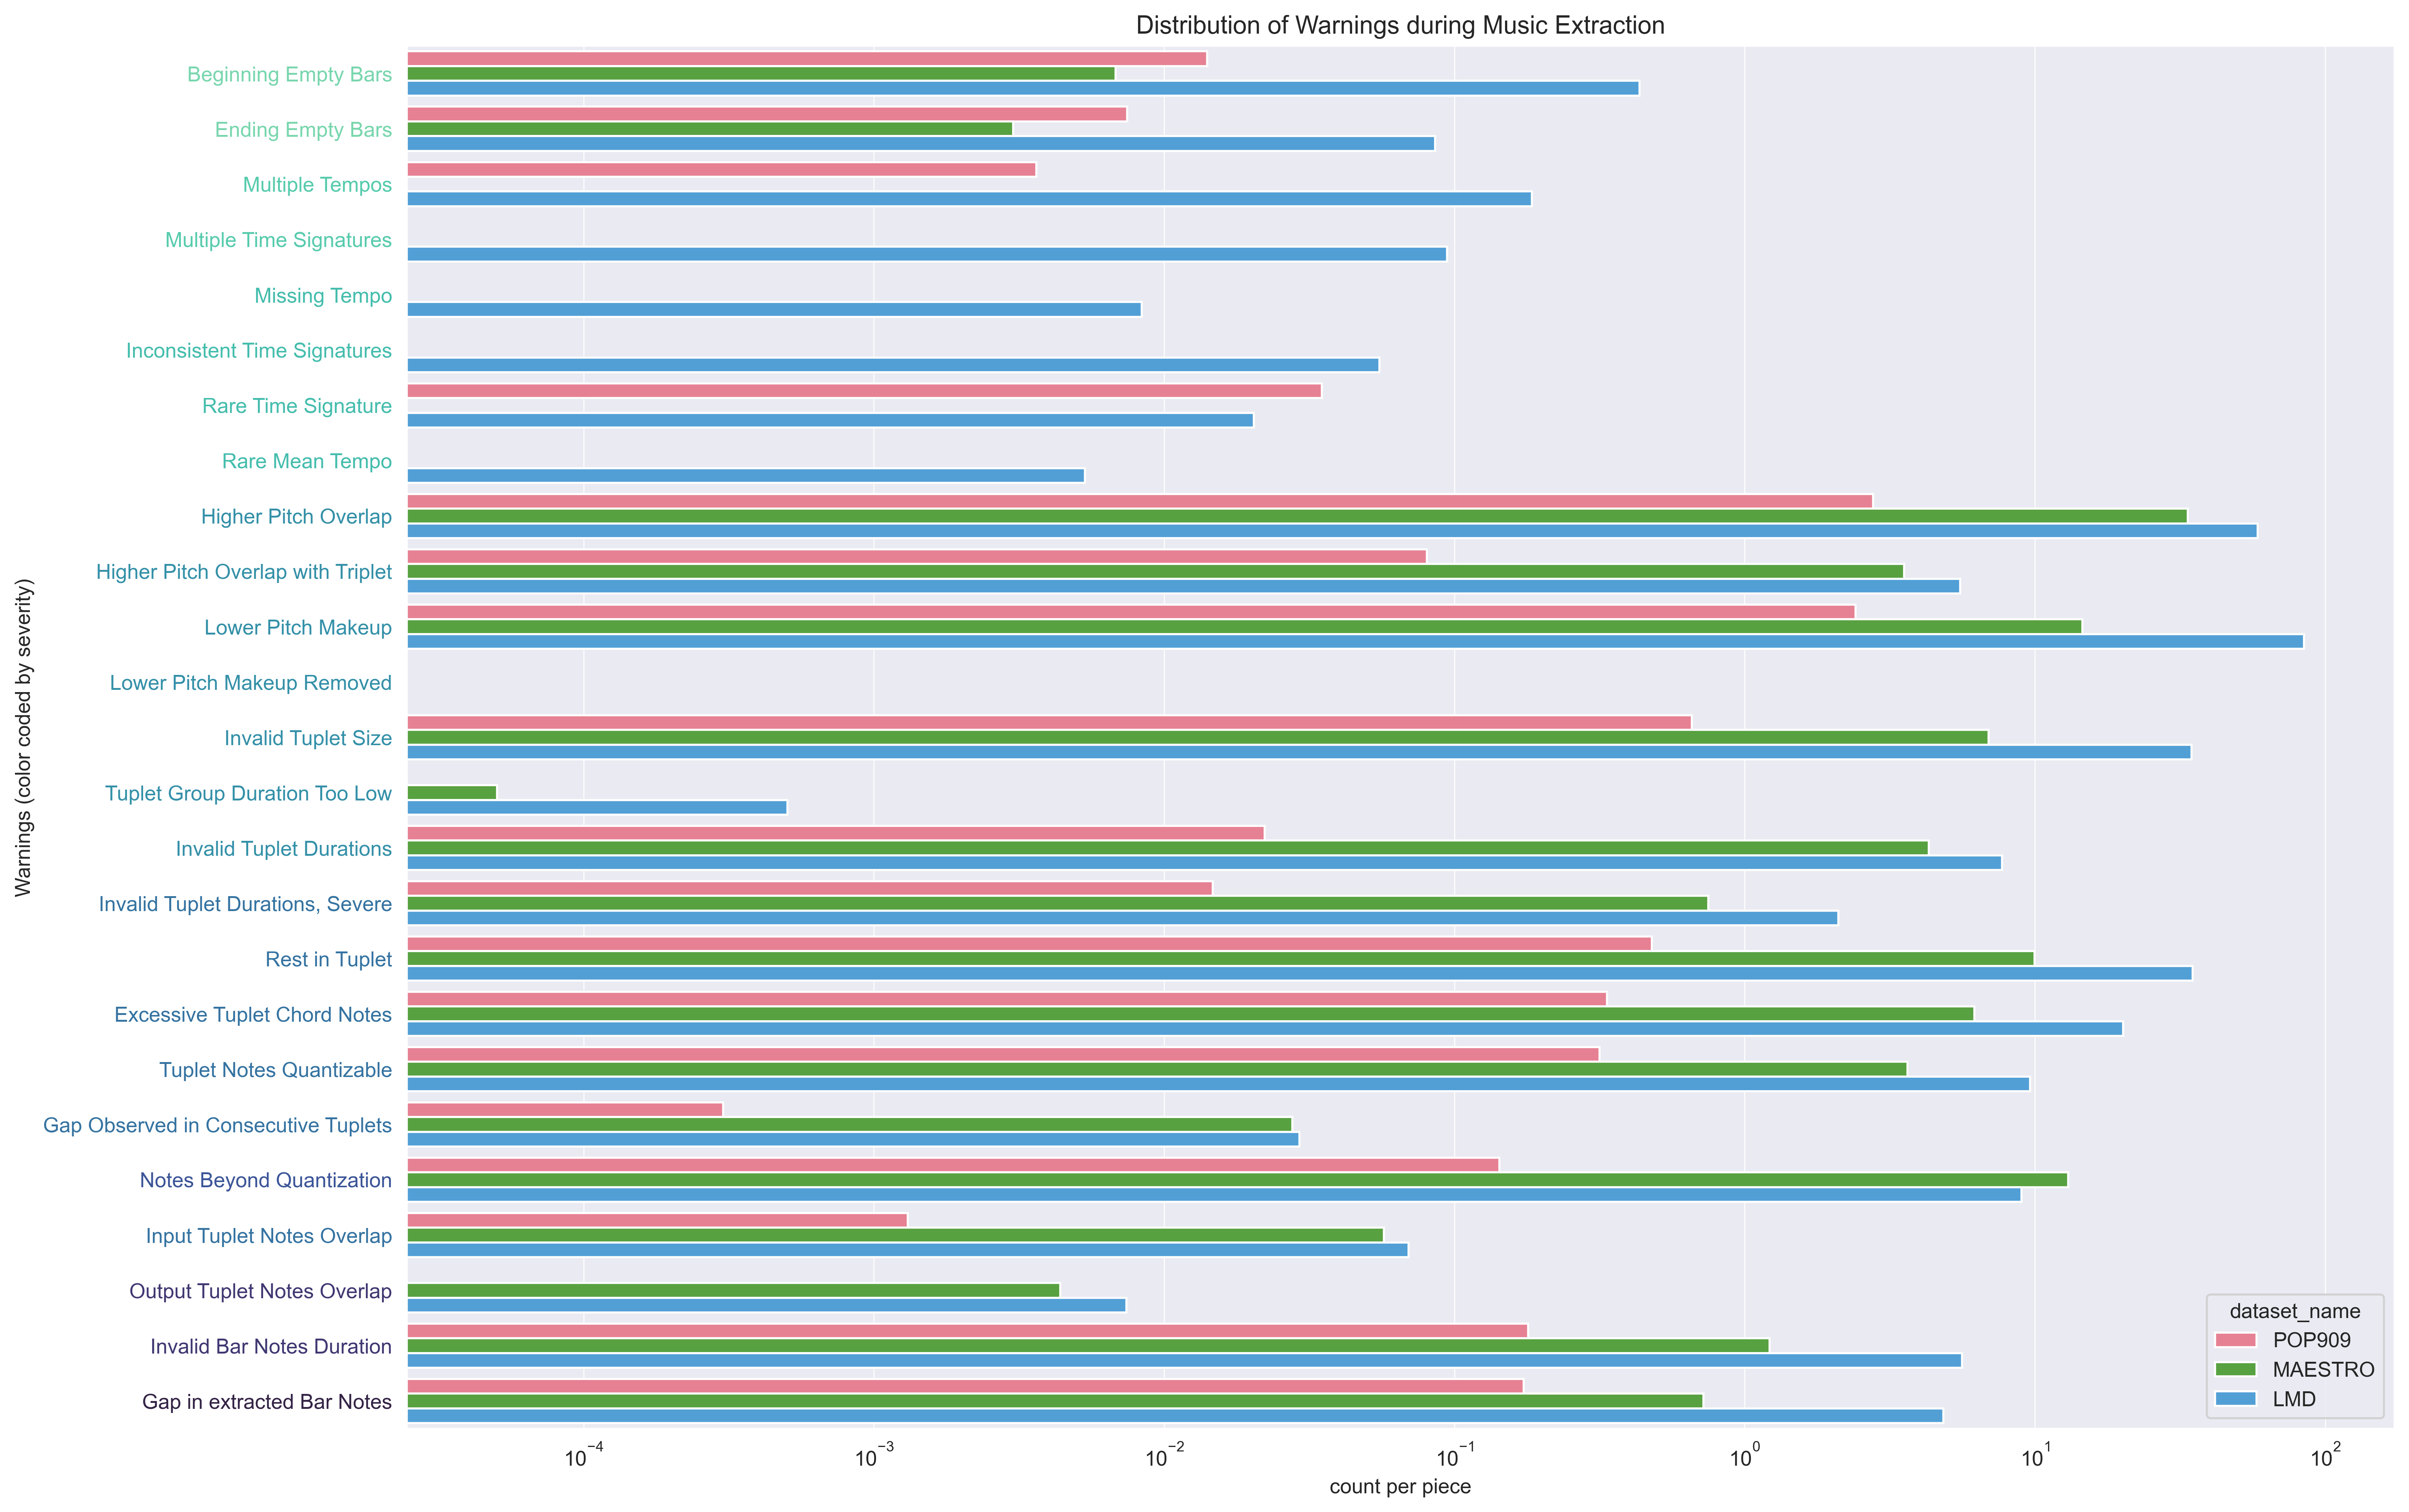

ic| mv.warning_type_dist().df:                                    type  total_count  average_count dataset_name                                    x         y
                               0                  Higher Pitch Overlap        54990       2.77e+00       POP909                 Higher Pitch Overlap  2.77e+00
                               1                    Lower Pitch Makeup        47749       2.41e+00       POP909                   Lower Pitch Makeup  2.41e+00
                               2                   Invalid Tuplet Size        13063       6.58e-01       POP909                  Invalid Tuplet Size  6.58e-01
                               3                        Rest in Tuplet         9506       4.79e-01       POP909                       Rest in Tuplet  4.79e-01
                               4          Excessive Tuplet Chord Notes         6658       3.35e-01       POP909         Excessive Tuplet Chord Notes  3.35e-01
                               5              

In [10]:
mic(mv.warning_type_dist().df);

